# Exploring the Datasets

### Summary of Findings

More cleanup may be necessary on the Third Party Sign Inventory by Ward dataset.  There are a large number of unique sign sizes that were created by different people working on the 44 different source files.  Perhaps grouping them into a small/medium/large category or determining the total sign area (LxW) in a common unit of measure will be helpful.  The X and Y coordinate values do not correspond to the latitude and longitude numbers, so some form of conversion will be necessary to plot the signs on the same map as the traffic incidents dataset.  A review the outliers in these X and Y coordinate fields as well to determine a possible solution.  The sign owner information needs to be cleaned as well.

The Police KSI data appears to be fairly clean.  Further review of this dataset is required to determine which columns are necessary for upcoming analysis.

The modeling methodology is still in the planning stages.  A handy tutorial from the University of Helsinki is proving to be informative: https://automating-gis-processes.github.io/CSC18/lessons/L1/Intro-Python-GIS.html

Until the review of the tutorial is complete, I won't know what I will be capable of using for any geospatial analysis.  I'm hoping to be able to determine number of signs near clusters of traffic accidents plus the details of the signs and accidents themselves in order to produce some relevent information.

### Third Party Sign Inventory by Ward

From the metadata file found as part of the package downloaded from https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/business/#9b6f952e-52d7-1fc4-51f6-4ad6bc913218:

|Column|Description|Format|
|------|-----------|------|
|Sign Account|A Tracking number for the sign structure for the purposes of the Third Party Sign Tax| |
|Street Number|Street number in the street address of the property where the sign is located|Alphanumeric|
|Street Name|Street name in the street address of the property where the sign is located| |
|Size (L x W)|The Length and Height dimension of the sign face|In feet|
|Location Description (If no address)|Description of the property where the sign is located if an exact address is not currently available|Free form text|
|X Coordinate|Geodetic coordinate of the sign structure| |
|Y Coordinate|Geodetic coordinate of the sign structure| |
|Sign Type|The Type of sign or sign structure|E.G. "GROUND" OR "ROOF"|
|Sign Technology|The Technology used to display the sign copy|E.G. "STATIC" OR "TRIVISION"|
|Sign Face Direction|The direction that the sign copy is facing|E.G. "N. S, E, W"|
|Illumination|The style of lighting on the sign or sign structure|E.G. "UP" OR "BACKLIT"|
|Sign Owner|The owner of the sign or the company in control of the sign copy| |
|Sign Owner Identifier|A unique identifier used by the Sign Owner|Alphanumeric|
|Context Picture Hyperlink|A web link to an aerial photo of the sign and surrounding area|Hyperlink|


!conda install -c anaconda xlrd --yes

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import xlrd

# Set the file path
fp = "../data/SignData"

df_signs = None

# Loop through the excel source files and build the consolidated dataframe
# Do this backwards as most of the files do not share the same column names as file 1
for i in range(44,0, -1):
    
    # file 22 starts on a different row on the spreadsheet
    if i!=22:
        df_temp = pd.read_excel(fp + "/WARD " + str(i) + ".xls", skiprows=4)
    else:
        df_temp = pd.read_excel(fp + "/WARD " + str(i) + ".xls", skiprows=5)
        
    df_temp['Ward_ID'] = i
    
    # Check for the presense of a "NOTES" column, then remove it
    if "NOTES" in df_temp.columns:
        df_temp.drop(columns="NOTES", inplace=True)    
    
    # for the first file, get the list of columns to copy to the other files as they are imported    
    if i==44:
        df_signs = df_temp.copy()
        col_names = df_signs.columns
        # Some debugging here...
        print(col_names)
        print(str(len(df_temp.columns)) + " : " + str(i))
    else:
        # Some debugging here...
        print(str(i) + " : " + str(df_temp.columns.difference(col_names)))
        df_temp.columns = col_names
        df_signs = df_signs.append(df_temp, ignore_index=True, sort=False)
        print(str(len(df_temp.columns)) + " : " + str(i) + " : " + str(df_temp.shape))

Index(['Sign Account', 'Street Number', 'Street Name', 'Size (LxW)',
       'Location Description (if no address)', 'X Coordinate', 'Y Coordinate',
       'Sign Type', 'Sign Technology (description)', 'Sign Face Direction',
       'Illumination', 'Sign Co. Name', 'Sign Co. Sign Identifier',
       'Context Picture Hyperlink', 'Ward_ID'],
      dtype='object')
15 : 44
43 : Index(['SIZE (LXW)'], dtype='object')
15 : 43 : (28, 15)
42 : Index(['SIZE (LXW)'], dtype='object')
15 : 42 : (37, 15)
41 : Index(['SIZE (LXW)'], dtype='object')
15 : 41 : (90, 15)
40 : Index(['SIZE (LXW)'], dtype='object')
15 : 40 : (25, 15)
39 : Index([], dtype='object')
15 : 39 : (7, 15)
38 : Index([], dtype='object')
15 : 38 : (34, 15)
37 : Index(['SIZE (LXW)'], dtype='object')
15 : 37 : (128, 15)
36 : Index(['SIZE (LXW)'], dtype='object')
15 : 36 : (64, 15)
35 : Index(['SIZE (LXW)'], dtype='object')
15 : 35 : (133, 15)
34 : Index(['SIZE (LXW)'], dtype='object')
15 : 34 : (64, 15)
33 : Index([], dtype='object')
15

In [2]:
# Replace the column names with the list of names provided in the metadata file
meta_cols = ['Sign Account', 'Street Number', 'Street Name', 'Size (LxW)',
       'Location Description (if no address)', 'X Coordinate', 'Y Coordinate',
       'Sign Type', 'Sign Technology', 'Sign Face Direction',
       'Illumination', 'Sign Owner', 'Sign Owner Identifier',
       'Context Picture Hyperlink', 'Ward_ID']

df_signs.columns = meta_cols

In [3]:
df_signs.head()

Sign Account Street Number  Street Name Size (LxW)  \
0       44-001     4566-4568  KINGSTON RD    10 x 20   
1       44-001     4566-4568  KINGSTON RD    10 x 20   
2       44-002          4528  KINGSTON RD    10 x 20   
3       44-002          4528  KINGSTON RD    10 x 20   
4       44-002          4528  KINGSTON RD    10 x 20   

                Location Description (if no address) X Coordinate  \
0  On Kingston Rd. between Military Trail & Morni...       330183   
1  On Kingston Rd. between Military Trail & Morni...       330184   
2  On Kingston Rd. between Military Trail & Morni...       330056   
3  On Kingston Rd. between Military Trail & Morni...       330060   
4  On Kingston Rd. between Military Trail & Morni...       330061   

  Y Coordinate Sign Type Sign Technology Sign Face Direction Illumination  \
0  4.84801e+06    Ground          Static                   W         Down   
1    4.848e+06    Ground          Static                   E         Down   
2  4.84784e+06      Roof          Static                  NE           Up   
3  4.84784e+06      Roof          Static                  NE           Up   
4  4.84784e+06      Roof          Static                  SW           Up   

  Sign Owner Sign Owner Identifier  \
0   Pattison                 5364A   
1   Pattison                 5364B   
2        CBS                  1633   
3        CBS                  1634   
4        CBS                  1631   

                           Context Picture Hyperlink  Ward_ID  
0  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
1  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
2  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
3  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
4  http://maps.live.com/default.aspx?v=2&FORM=LML...       44

In [4]:
df_signs.tail()

Sign Account Street Number  Street Name Size (LxW)  \
69518       01-033          2001    ALBION RD  10' x 20'   
69519       01-036     1058-1066    ALBION RD  10' x 20'   
69520       01-036     1058-1066    ALBION RD  10' x 20'   
69521       01-037            40  WESTMORE DR  10' x 20'   
69522       01-037            40  WESTMORE DR  10' x 20'   

         Location Description (if no address) X Coordinate Y Coordinate  \
69518  East of 427 and South of Steinway Cres       284584       484054   
69519                                     NaN       299560  4.84394e+06   
69520                                     NaN       299560  4.84394e+06   
69521                                     NaN       296315  4.84431e+06   
69522                                     NaN       296315  4.84431e+06   

      Sign Type Sign Technology Sign Face Direction Illumination Sign Owner  \
69518    Ground          Static                   W           Up   Pattison   
69519      Roof       Trivision                   E           Up        CBS   
69520      Roof       Trivision                   W           Up        CBS   
69521    Ground          Static                   N           Up   Pattison   
69522    Ground          Static                   S           Up   Pattison   

      Sign Owner Identifier  \
69518                 6150B   
69519                   NaN   
69520                   NaN   
69521                 5565A   
69522                 5565B   

                               Context Picture Hyperlink  Ward_ID  
69518  http://www.bing.com/maps/default.aspx?v=2&cp=r...        1  
69519  http://www.bing.com/maps/?v=2&cp=r8pnsz8c2mx2&...        1  
69520  http://www.bing.com/maps/?v=2&cp=r8pnsz8c2mx2&...        1  
69521  http://www.bing.com/maps/?v=2&cp=r8q3n48bzmfz&...        1  
69522  http://www.bing.com/maps/?v=2&cp=r8q3n48bzmfz&...        1

In [5]:
# Look at the shape of the dataframe
df_signs.shape

(69523, 15)

In [6]:
# Examine the fields
df_signs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69523 entries, 0 to 69522
Data columns (total 15 columns):
Sign Account                            4273 non-null object
Street Number                           4270 non-null object
Street Name                             4271 non-null object
Size (LxW)                              3999 non-null object
Location Description (if no address)    1610 non-null object
X Coordinate                            4232 non-null object
Y Coordinate                            4232 non-null object
Sign Type                               4272 non-null object
Sign Technology                         4266 non-null object
Sign Face Direction                     4140 non-null object
Illumination                            4227 non-null object
Sign Owner                              4271 non-null object
Sign Owner Identifier                   3465 non-null object
Context Picture Hyperlink               4078 non-null object
Ward_ID                              

In [7]:
# There seems to be a lot of empty cells.  Confirm this.
df_signs.isnull().sum(axis=0)

Sign Account                            65250
Street Number                           65253
Street Name                             65252
Size (LxW)                              65524
Location Description (if no address)    67913
X Coordinate                            65291
Y Coordinate                            65291
Sign Type                               65251
Sign Technology                         65257
Sign Face Direction                     65383
Illumination                            65296
Sign Owner                              65252
Sign Owner Identifier                   66058
Context Picture Hyperlink               65445
Ward_ID                                     0
dtype: int64

In [8]:
# How many rows are empty?  Let's view these rows
df_signs[df_signs.isnull().sum(axis=1)>7]

Sign Account Street Number Street Name Size (LxW)  \
2715        15-107           NaN         NaN        NaN   
3264           NaN           NaN         NaN        NaN   
3265           NaN           NaN         NaN        NaN   
3266           NaN           NaN         NaN        NaN   
3267           NaN           NaN         NaN        NaN   
3268           NaN           NaN         NaN        NaN   
3269           NaN           NaN         NaN        NaN   
3270           NaN           NaN         NaN        NaN   
3271           NaN           NaN         NaN        NaN   
3272           NaN           NaN         NaN        NaN   
3273           NaN           NaN         NaN        NaN   
3274           NaN           NaN         NaN        NaN   
3275           NaN           NaN         NaN        NaN   
3276           NaN           NaN         NaN        NaN   
3277           NaN           NaN         NaN        NaN   
3278           NaN           NaN         NaN        NaN   
3279           NaN           NaN         NaN        NaN   
3280           NaN           NaN         NaN        NaN   
3281           NaN           NaN         NaN        NaN   
3282           NaN           NaN         NaN        NaN   
3283           NaN           NaN         NaN        NaN   
3284           NaN           NaN         NaN        NaN   
3285           NaN           NaN         NaN        NaN   
3286           NaN           NaN         NaN        NaN   
3287           NaN           NaN         NaN        NaN   
3288           NaN           NaN         NaN        NaN   
3289           NaN           NaN         NaN        NaN   
3290           NaN           NaN         NaN        NaN   
3291           NaN           NaN         NaN        NaN   
3292           NaN           NaN         NaN        NaN   
...            ...           ...         ...        ...   
68484          NaN           NaN         NaN        NaN   
68485          NaN           NaN         NaN        NaN   
68486          NaN           NaN         NaN        NaN   
68487          NaN           NaN         NaN        NaN   
68488          NaN           NaN         NaN        NaN   
68489          NaN           NaN         NaN        NaN   
68490          NaN           NaN         NaN        NaN   
68491          NaN           NaN         NaN        NaN   
68492          NaN           NaN         NaN        NaN   
68493          NaN           NaN         NaN        NaN   
68494          NaN           NaN         NaN        NaN   
68495          NaN           NaN         NaN        NaN   
68496          NaN           NaN         NaN        NaN   
68497          NaN           NaN         NaN        NaN   
68498          NaN           NaN         NaN        NaN   
68499          NaN           NaN         NaN        NaN   
68500          NaN           NaN         NaN        NaN   
68501          NaN           NaN         NaN        NaN   
68502          NaN           NaN         NaN        NaN   
68503          NaN           NaN         NaN        NaN   
68504          NaN           NaN         NaN        NaN   
68505          NaN           NaN         NaN        NaN   
68506          NaN           NaN         NaN        NaN   
68507          NaN           NaN         NaN        NaN   
68508          NaN           NaN         NaN        NaN   
68509          NaN           NaN         NaN        NaN   
68510          NaN           NaN         NaN        NaN   
68511          NaN           NaN         NaN        NaN   
68512          NaN           NaN         NaN        NaN   
68513          NaN           NaN         NaN        NaN   

                    Location Description (if no address) X Coordinate  \
2715                                                 NaN          NaN   
3264                                                 NaN          NaN   
3265                                                 NaN          NaN   
3266                                                 Na

In [9]:
# Most appear to be from Ward 11.  How many rows are not in Ward 11?
df_signs[(df_signs.isnull().sum(axis=1)>7) & (df_signs['Ward_ID']!=11)]

Sign Account Street Number Street Name Size (LxW)  \
2715       15-107           NaN         NaN        NaN   

     Location Description (if no address) X Coordinate Y Coordinate Sign Type  \
2715                                  NaN          NaN          NaN       NaN   

     Sign Technology Sign Face Direction Illumination Sign Owner  \
2715             NaN                 NaN          NaN        NaN   

     Sign Owner Identifier Context Picture Hyperlink  Ward_ID  
2715                   NaN                       NaN       15

In [10]:
# Drop these rows as they do not contribute anything useful
df_signs = df_signs[df_signs.isnull().sum(axis=1)<8]

In [11]:
# How many empty cells remain?
df_signs.isnull().sum(axis=0)

Sign Account                               0
Street Number                              2
Street Name                                1
Size (LxW)                               273
Location Description (if no address)    2663
X Coordinate                              40
Y Coordinate                              40
Sign Type                                  0
Sign Technology                            6
Sign Face Direction                      132
Illumination                              45
Sign Owner                                 1
Sign Owner Identifier                    807
Context Picture Hyperlink                194
Ward_ID                                    0
dtype: int64

In [12]:
# The X and Y coordinates will be most useful in the Geo-spatial analysis.  
# Check the rows where X and Y are empty
df_signs[df_signs['X Coordinate'].isnull()]

Sign Account Street Number        Street Name Size (LxW)  \
629        34-035             0      GREEN BELT DR  10' x 20'   
630        34-035             0      GREEN BELT DR  10' x 20'   
1003       30-125             9         DAVIES AVE      68.74   
1005       30-129            79   EAST DON ROADWAY   96.62 m2   
1432       27-136            19      YORKVILLE AVE       18m2   
1660       23-051            89        FINCH AVE W        NaN   
1661       23-051            89        FINCH AVE W        NaN   
1662       23-052     4702-4704           YONGE ST        NaN   
1663       23-052     4702-4704           YONGE ST        NaN   
1664       23-053          5050           YONGE ST        NaN   
1665       23-053          5050           YONGE ST        NaN   
1720       22-092           327        LONSDALE RD    13.43m2   
1920       20-260           267         QUEEN ST W     374 m2   
1977       20-201            47          SIMCOE ST        NaN   
2376       17-078          38 R         ALDBURN RD    10 x 20   
2377       17-079     2029-2031     EGLINTON AVE W    10 x 20   
2378       17-079     2029-2031     EGLINTON AVE W    10 x 20   
2379       17-080           229          GEARY AVE  10' x 20'   
2380       17-080           229          GEARY AVE  10' x 20'   
2384       17-084          1795     ST CLAIR AVE W  10' x 20'   
2385       17-084          1795     ST CLAIR AVE W  10' x 20'   
2386       17-085          1024     ST CLAIR AVE W  10' x 20'   
2387       17-086          1687     ST CLAIR AVE W  10' x 20'   
2389       17-087          1885     EGLINTON AVE W  10' x 20'   
2390       17-087          1885     EGLINTON AVE W  10' x 20'   
2495       16-060          2300           YONGE ST     7.85m2   
2496       16-061          2658           YONGE ST  10' x 40'   
2822       14-067         1468A         QUEEN ST W        NaN   
2823       14-068           38R         ALDBURN RD        NaN   
2824       14-069           60     HOWARD PARK AVE        NaN   
2825       14-069           60     HOWARD PARK AVE        NaN   
2826       14-070            24    HOWARD PARK AVE        NaN   
2827       14-070            24    HOWARD PARK AVE        NaN   
2829       14-072           860  LAKE SHORE BLVD W  20' X 20'   
2830       14-072           860  LAKE SHORE BLVD W  20' X 20'   
3025       12-051          2265           KEELE ST  10' x 20'   
3026       12-051          2265           KEELE ST  10' x 20'   
3029       12-053            25     PHOTOGRAPHY DR  10' X 20'   
3030       12-054          1515                NaN        NaN   
3031       12-055          1515           KEELE ST        NaN   

                   Location Description (if no address) X Coordinate  \
629   South of Lawrence Ave. E., West of DVP & CNR, ...          NaN   
630   South of Lawrence Ave. E., West of DVP & CNR, ...          NaN   
1003                                                NaN          NaN   
1005                                                NaN          NaN   
1432                                                NaN          NaN   
1660            S/W corner of Talbot Rd and Finch Ave W          NaN   
1661            S/W corner of Talbot Rd and Finch Ave W          NaN   
1662                                                NaN          NaN   
1663                                                NaN          NaN   
1664                                                NaN          NaN   
1665                                                NaN          NaN   
1720                                                NaN          NaN   
1920          East of Duncan St., South of Queen St. W.          NaN   
1977                                                NaN          NaN   
2376          St Clair Ave West, 100m west of Caledonia          NaN   
2377   On the South West corner of Eglinton Ave W an...          NaN   
2378   On the South West corner of Eglinton Ave W an...          NaN   
2379  On the South East corner of Geary Ave

In [13]:
# For now, any NaN in the X and Y Coordinate columns will be changed to zero
df_signs['X Coordinate'][df_signs['X Coordinate'].isnull()] = 0
df_signs['Y Coordinate'][df_signs['Y Coordinate'].isnull()] = 0

In [14]:
# Check the NaN under the street number
df_signs[df_signs['Street Number'].isnull()]

Sign Account Street Number  Street Name Size (LxW)  \
2925       13-063           NaN  DUNDAS ST W  10' x 40'   
2926       13-063           NaN  DUNDAS ST W  10' x 40'   

     Location Description (if no address) X Coordinate Y Coordinate Sign Type  \
2925                                  NaN       305902    483942.20    Ground   
2926                                  NaN       305902    483942.20    Ground   

     Sign Technology Sign Face Direction Illumination Sign Owner  \
2925          Static                   W           Up   Pattison   
2926          Static                   E           Up   Pattison   

     Sign Owner Identifier                          Context Picture Hyperlink  \
2925                   NaN  http://www.bing.com/maps/?v=2&cp=r89v308c8jf9&...   
2926                   NaN  http://www.bing.com/maps/?v=2&cp=r89v308c8jf9&...   

      Ward_ID  
2925       13  
2926       13

In [15]:
# According to the hyperlink, the address is 3441 Dundas St W
df_signs['Street Number'][df_signs['Street Number'].isnull()] = 3441

In [16]:
# Check the street name NaN
df_signs[df_signs['Street Name'].isnull()]

Sign Account Street Number Street Name Size (LxW)  \
3030       12-054          1515         NaN        NaN   

        Location Description (if no address) X Coordinate Y Coordinate  \
3030  N/E corner of Keele St and Lavender Rd            0            0   

     Sign Type Sign Technology Sign Face Direction     Illumination  \
3030  Pedestal          Static                 NaN  No Illumination   

     Sign Owner Sign Owner Identifier Context Picture Hyperlink  Ward_ID  
3030   Pattison                   NaN                       NaN       12

In [17]:
# According to the hyperlink and street number, this is most likely on Keele St
df_signs['Street Name'][df_signs['Street Name'].isnull()] = 'KEELE ST'

In [18]:
# Change all NaN under the remaining columns to 'unknown'
df_signs['Size (LxW)'][df_signs['Size (LxW)'].isnull()] = 'unknown'
df_signs['Location Description (if no address)'][df_signs['Location Description (if no address)'].isnull()] = 'unknown'
df_signs['Sign Technology'][df_signs['Sign Technology'].isnull()] = 'unknown'
df_signs['Sign Face Direction'][df_signs['Sign Face Direction'].isnull()] = 'unknown'
df_signs['Illumination'][df_signs['Illumination'].isnull()] = 'unknown'
df_signs['Sign Owner'][df_signs['Sign Owner'].isnull()] = 'unknown'
df_signs['Sign Owner Identifier'][df_signs['Sign Owner Identifier'].isnull()] = 'unknown'
df_signs['Context Picture Hyperlink'][df_signs['Context Picture Hyperlink'].isnull()] = 'unknown'

In [19]:
# Verify no nulls exist
df_signs.isnull().sum(axis=0)

Sign Account                            0
Street Number                           0
Street Name                             0
Size (LxW)                              0
Location Description (if no address)    0
X Coordinate                            0
Y Coordinate                            0
Sign Type                               0
Sign Technology                         0
Sign Face Direction                     0
Illumination                            0
Sign Owner                              0
Sign Owner Identifier                   0
Context Picture Hyperlink               0
Ward_ID                                 0
dtype: int64

In [20]:
# Examine the Size (LxW) field
print(df_signs['Size (LxW)'].value_counts())

10' x 20'                2476
10 x 20                   348
12' x 16'                 336
unknown                   273
10' x 40'                 128
10 X 20                    58
12 x 16                    54
10' x 23'                  43
10' x 35'                  35
10' x 25'                  30
14' x 48'                  27
5.6m2                      26
pedestal                   19
10' X 20'                  19
10' x 20'                  14
2.25 m² x 4 sides          11
12' X 16'                   9
2.25m² x 4 sides            8
8.92m2                      8
10' x 50'                   7
20' x 60'                   6
10' x 30'                   5
15' x 40'                   5
10 x 20                     4
10 x 40                     4
10'  x 20'                  4
Pedestal                    4
20' X 20'                   4
10' x 40' structure         4
12 x16                      4
                         ... 
68.74 m²                    1
16' x 104'                  1
73.51 m2  

In [21]:
# a bit if a mess... first get rid of the ' symbol as it is presumed to be feet from the metadata file
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("'","")
df_signs['Size (LxW)'].value_counts()

10 x 20                  2827
12 x 16                   392
unknown                   273
10 x 40                   132
10 X 20                    77
10 x 23                    43
10 x 35                    35
10 x 25                    30
14 x 48                    27
5.6m2                      26
pedestal                   19
10 x 20                    18
2.25 m² x 4 sides          11
12 X 16                    10
8.92m2                      8
2.25m² x 4 sides            8
10 x 50                     7
20 x 60                     6
10 x 30                     5
15 x 40                     5
10X20                       5
20 X 20                     4
12 x16                      4
15 x 25                     4
Pedestal                    4
10 X 40                     4
25 x 25                     4
10  x 20                    4
10 x 40 structure           4
2.25 m² x 2                 3
                         ... 
7.6 m x 12.2 m              1
18 x 28                     1
18.5 m²   

In [22]:
# Next replace capital X with lower case x
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("X","x")
df_signs['Size (LxW)'].value_counts()

10 x 20                  2904
12 x 16                   402
unknown                   273
10 x 40                   136
10 x 23                    46
10 x 35                    37
10 x 25                    31
14 x 48                    27
5.6m2                      26
pedestal                   19
10 x 20                    18
2.25 m² x 4 sides          11
2.25m² x 4 sides            8
8.92m2                      8
10 x 50                     7
20 x 20                     6
20 x 60                     6
10 x 30                     5
10x20                       5
15 x 40                     5
10  x 20                    4
12 x16                      4
10 x 40 structure           4
Pedestal                    4
15 x 25                     4
25 x 25                     4
40 x 20                     3
2.25 m² x 2                 3
31.39m2                     3
19 x 25                     3
                         ... 
7.6 m x 12.2 m              1
18.5 m²                     1
34.83m2   

In [23]:
# Next remove any "= xxx" patterns
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("=.*","", regex=True)
#df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("\s{2,}"," ", regex=True)
df_signs['Size (LxW)'].value_counts()

10 x 20              2904
12 x 16               402
unknown               273
10 x 40               136
10 x 23                47
10 x 35                37
10 x 25                31
14 x 48                27
5.6m2                  26
pedestal               19
10 x 20                18
2.25 m² x 4 sides      11
8.92m2                  8
2.25m² x 4 sides        8
10 x 50                 7
20 x 20                 6
20 x 60                 6
10 x 30                 5
15 x 40                 5
10x20                   5
12 x16                  4
25 x 25                 4
10  x 20                4
10 x 40 structure       4
Pedestal                4
15 x 25                 4
40 x 20                 3
31.39m2                 3
2.25 m² x 2             3
19 x 25                 3
                     ... 
34.83m2                 1
65.34m2                 1
25m2                    1
55.74 m²                1
40 m²                   1
68.74 m²                1
4.5 m x 4.5 m           1
14 x 40     

In [24]:
# Next replace m2 with m
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("m2",u'm\u00B2')
# ensure there is at least one space surrounding each m2
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace(u'm\u00B2',u' m\u00B2 ')
df_signs['Size (LxW)'].value_counts()

10 x 20                                                        2904
12 x 16                                                         402
unknown                                                         273
10 x 40                                                         136
10 x 23                                                          47
10 x 35                                                          37
10 x 25                                                          31
14 x 48                                                          27
5.6 m²                                                           26
pedestal                                                         19
10 x 20                                                          18
2.25  m²  x 4 sides                                              11
2.25 m²  x 4 sides                                                8
8.92 m²                                                           8
10 x 50                                         

In [25]:
# Next ensure there is at least a single space around each 'x'
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("x"," x ")
df_signs['Size (LxW)'].value_counts()

10  x  20                                                        2904
12  x  16                                                         402
unknown                                                           273
10  x  40                                                         136
10  x  23                                                          47
10  x  35                                                          37
10  x  25                                                          31
14  x  48                                                          27
5.6 m²                                                             26
pedestal                                                           19
10  x  20                                                          18
2.25  m²   x  4 sides                                              11
2.25 m²   x  4 sides                                                8
8.92 m²                                                             8
10  x  50           

In [26]:
# Next replace multiple spaces with a single space
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("\s{2,}"," ", regex=True)
df_signs['Size (LxW)'].value_counts()

10 x 20              2914
12 x 16               406
unknown               273
10 x 40               137
10 x 23                47
10 x 35                37
10 x 25                32
14 x 48                27
5.6 m²                 26
pedestal               19
2.25 m² x 4 sides      19
10 x 20                18
8.92 m²                 8
10 x 50                 7
20 x 20                 6
20 x 60                 6
10 x 30                 5
15 x 40                 5
15 x 25                 4
Pedestal                4
25 x 25                 4
10 x 40 structure       4
2.25 m²                 3
19 x 25                 3
25 x 50                 3
2.25 m² x 2             3
40 x 20                 3
31.39 m²                3
25 m²                   3
4 x 6 x 3sides          2
                     ... 
104 m²                  1
9.3m x 7.5m             1
16m x 6m                1
18.49 m²                1
18.5 m²                 1
12 m²                   1
34.83 m²                1
7.6 m x 12.2

In [27]:
# Strip any leading or trailing whitespace
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.strip()
df_signs['Size (LxW)'].value_counts()

10 x 20              2932
12 x 16               406
unknown               273
10 x 40               139
10 x 23                47
10 x 35                37
10 x 25                32
14 x 48                27
5.6 m²                 26
pedestal               19
2.25 m² x 4 sides      19
8.92 m²                 8
10 x 50                 7
20 x 60                 6
20 x 20                 6
10 x 30                 6
15 x 40                 5
Pedestal                4
25 x 25                 4
15 x 25                 4
10 x 40 structure       4
25 m²                   3
2.25 m²                 3
25 x 50                 3
31.39 m²                3
2.25 m² x 2             3
19 x 25                 3
40 x 20                 3
32 x 12                 2
2.25 m² x 4             2
                     ... 
30 x 100                1
9.3m x 7.5m             1
16m x 6m                1
5.08 m x 3.86 m         1
54 m²                   1
122.63 m²               1
388.52 m²               1
7.6 m x 12.2

In [28]:
# Next replace pedestal with Pedestal
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace("pedestal","Pedestal")
df_signs['Size (LxW)'].value_counts()

10 x 20              2932
12 x 16               406
unknown               273
10 x 40               139
10 x 23                47
10 x 35                37
10 x 25                32
14 x 48                27
5.6 m²                 26
Pedestal               23
2.25 m² x 4 sides      19
8.92 m²                 8
10 x 50                 7
10 x 30                 6
20 x 20                 6
20 x 60                 6
15 x 40                 5
25 x 25                 4
15 x 25                 4
10 x 40 structure       4
2.25 m²                 3
40 x 20                 3
19 x 25                 3
25 m²                   3
25 x 50                 3
31.39 m²                3
2.25 m² x 2             3
32 x 12                 2
13 x 40                 2
50 x 50                 2
                     ... 
30 x 100                1
9.3m x 7.5m             1
16m x 6m                1
5.08 m x 3.86 m         1
54 m²                   1
122.63 m²               1
388.52 m²               1
7.6 m x 12.2

In [29]:
# Next remove " structure"
df_signs['Size (LxW)'] = df_signs['Size (LxW)'].str.replace(" structure","")
df_signs['Size (LxW)'].value_counts()

10 x 20              2932
12 x 16               406
unknown               273
10 x 40               143
10 x 23                47
10 x 35                37
10 x 25                32
14 x 48                27
5.6 m²                 26
Pedestal               23
2.25 m² x 4 sides      19
8.92 m²                 8
10 x 50                 7
20 x 60                 6
20 x 20                 6
10 x 30                 6
15 x 40                 5
15 x 25                 4
25 x 25                 4
2.25 m² x 2             3
25 x 50                 3
25 m²                   3
19 x 25                 3
31.39 m²                3
2.25 m²                 3
40 x 20                 3
10 x 24                 2
50 x 50                 2
98 m²                   2
4 x 7                   2
                     ... 
30 x 100                1
9.3m x 7.5m             1
16m x 6m                1
5.08 m x 3.86 m         1
54 m²                   1
122.63 m²               1
388.52 m²               1
7.6 m x 12.2

In [30]:
# Examine the Sign Technology field
print(df_signs['Sign Technology'].value_counts())

Static                                                                                                    3734
static                                                                                                     177
Trivision                                                                                                   88
Tri-Vision                                                                                                  62
Tri Vision                                                                                                  19
Static (Faces:2)                                                                                            15
Single Face, Static                                                                                         14
Digital LED                                                                                                 12
Digital                                                                                                     11
V

In [31]:
# Cleanup - first convert all to Upper Case
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.upper()
df_signs['Sign Technology'].value_counts()

STATIC                                                                                                    3912
TRIVISION                                                                                                   93
TRI-VISION                                                                                                  62
TRI VISION                                                                                                  25
STATIC (FACES:2)                                                                                            21
SINGLE FACE, STATIC                                                                                         14
DIGITAL LED                                                                                                 12
DIGITAL                                                                                                     11
VIDEO DISPLAY                                                                                                9
S

In [32]:
# Fix Trivision spelling issues
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TRI-VISION","TRIVISION")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TRI VISION","TRIVISION")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TRIVISON","TRIVISION")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TIRIVISON","TRIVISION")
df_signs['Sign Technology'].value_counts()

STATIC                                                                                                   3912
TRIVISION                                                                                                 188
STATIC (FACES:2)                                                                                           21
SINGLE FACE, STATIC                                                                                        14
DIGITAL LED                                                                                                12
DIGITAL                                                                                                    11
VIDEO DISPLAY                                                                                               9
STATIC (FACE:4)                                                                                             9
STATIC(FACES:2)                                                                                             8
MURAL     

In [33]:
# Fix issues with the FACES labels
# Update - regardless of the number of faces, it is still a static sign.  Remove the faces info.
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("SINGLE FACE, ","")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("FACE:","FACES:")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("("," (")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("FACES: ","FACES:")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace(" FACES:","FACES:")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("\s{2,}"," ", regex=True)
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.strip()

df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("\s\(FACES:[245]\)","", regex=True)
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.strip()

df_signs['Sign Technology'].value_counts()

STATIC                                               3995
TRIVISION                                             193
DIGITAL LED                                            12
DIGITAL                                                11
VIDEO DISPLAY                                           9
MURAL                                                   7
UNKNOWN                                                 6
VDB                                                     5
ELECTRONIC MOVING COPY                                  4
READOGRAPH AND STATIC                                   3
ONE STATIC, ONE READOGRAPH                              3
VIDEO DISPLAY BOARD                                     2
PEDESTAL                                                2
STATIC AND READOGRAPH                                   2
TRIVISION AND VDB                                       2
STATIC READOGRAPH                                       2
STATIC; READOGRAPH                                      1
ONE STATIC, ON

In [34]:
# Fix issues with the Digital LED labels
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("DIGITAL LED","LED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("DIGITAL","LED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("ELECTRONIC MOVING COPY","LED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.strip()
df_signs['Sign Technology'].value_counts()

STATIC                                               3995
TRIVISION                                             193
LED                                                    28
VIDEO DISPLAY                                           9
MURAL                                                   7
UNKNOWN                                                 6
VDB                                                     5
ONE STATIC, ONE READOGRAPH                              3
READOGRAPH AND STATIC                                   3
STATIC AND READOGRAPH                                   2
TRIVISION AND VDB                                       2
VIDEO DISPLAY BOARD                                     2
PEDESTAL                                                2
STATIC READOGRAPH                                       2
STATIC, VDB                                             1
READOGRAPH                                              1
VDB, STATIC                                             1
STATIC TRIVISI

In [35]:
# Fix issues with the Video Display Boards
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("VIDEO DISPLAY BOARD","VDB")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("VIDEO DISPLAY","VDB")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.strip()
df_signs['Sign Technology'].value_counts()

STATIC                                     3995
TRIVISION                                   193
LED                                          28
VDB                                          16
MURAL                                         7
UNKNOWN                                       6
ONE STATIC, ONE READOGRAPH                    3
READOGRAPH AND STATIC                         3
TRIVISION AND VDB                             2
STATIC AND READOGRAPH                         2
PEDESTAL                                      2
STATIC READOGRAPH                             2
READOGRAPH                                    1
STATIC, VDB                                   1
STATIC TRIVISION VDB                          1
VDB, STATIC                                   1
VINYL                                         1
TRIVISION, STATIC, LED                        1
STATIC/LED                                    1
STATIC; READOGRAPH                            1
ONE STATIC, ONE VDB, ONE TRIVISION FACE 

In [36]:
# Fix the painted mural label
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("PAINTED MURAL","MURAL")
df_signs['Sign Technology'].value_counts()

STATIC                                     3995
TRIVISION                                   193
LED                                          28
VDB                                          16
MURAL                                         8
UNKNOWN                                       6
READOGRAPH AND STATIC                         3
ONE STATIC, ONE READOGRAPH                    3
PEDESTAL                                      2
STATIC READOGRAPH                             2
TRIVISION AND VDB                             2
STATIC AND READOGRAPH                         2
READOGRAPH                                    1
STATIC, VDB                                   1
STATIC AND VDB                                1
STATIC TRIVISION VDB                          1
VDB, STATIC                                   1
VINYL                                         1
TRIVISION, STATIC, LED                        1
STATIC/LED                                    1
STATIC; READOGRAPH                      

In [37]:
# Any value identifying more then one technology, change to MIXED
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("READOGRAPH AND STATIC","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("ONE STATIC, ONE READOGRAPH","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TRIVISION AND VDB","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("STATIC AND READOGRAPH","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("STATIC READOGRAPH","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("VDB, STATIC","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TRIVISION AND SINGLE FACE STATIC","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("STATIC; READOGRAPH","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("STATIC, VDB","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("STATIC TRIVISION VDB","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TRIVISION/ VDB/STATIC","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("STATIC/LED","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("TRIVISION, STATIC, LED","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("STATIC AND VDB","MIXED")
df_signs['Sign Technology'] = df_signs['Sign Technology'].str.replace("ONE STATIC, ONE VDB, ONE TRIVISION FACE","MIXED")
df_signs['Sign Technology'].value_counts()

STATIC        3995
TRIVISION      193
LED             28
MIXED           22
VDB             16
MURAL            8
UNKNOWN          6
PEDESTAL         2
VINYL            1
READOGRAPH       1
Name: Sign Technology, dtype: int64

In [38]:
df_signs.head()

Sign Account Street Number  Street Name Size (LxW)  \
0       44-001     4566-4568  KINGSTON RD    10 x 20   
1       44-001     4566-4568  KINGSTON RD    10 x 20   
2       44-002          4528  KINGSTON RD    10 x 20   
3       44-002          4528  KINGSTON RD    10 x 20   
4       44-002          4528  KINGSTON RD    10 x 20   

                Location Description (if no address) X Coordinate  \
0  On Kingston Rd. between Military Trail & Morni...       330183   
1  On Kingston Rd. between Military Trail & Morni...       330184   
2  On Kingston Rd. between Military Trail & Morni...       330056   
3  On Kingston Rd. between Military Trail & Morni...       330060   
4  On Kingston Rd. between Military Trail & Morni...       330061   

  Y Coordinate Sign Type Sign Technology Sign Face Direction Illumination  \
0  4.84801e+06    Ground          STATIC                   W         Down   
1    4.848e+06    Ground          STATIC                   E         Down   
2  4.84784e+06      Roof          STATIC                  NE           Up   
3  4.84784e+06      Roof          STATIC                  NE           Up   
4  4.84784e+06      Roof          STATIC                  SW           Up   

  Sign Owner Sign Owner Identifier  \
0   Pattison                 5364A   
1   Pattison                 5364B   
2        CBS                  1633   
3        CBS                  1634   
4        CBS                  1631   

                           Context Picture Hyperlink  Ward_ID  
0  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
1  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
2  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
3  http://maps.live.com/default.aspx?v=2&FORM=LML...       44  
4  http://maps.live.com/default.aspx?v=2&FORM=LML...       44

In [39]:
# Check the shape of the remaining data
df_signs.shape

(4272, 15)

In [40]:
# List the types of each column
print(df_signs.dtypes)

Sign Account                            object
Street Number                           object
Street Name                             object
Size (LxW)                              object
Location Description (if no address)    object
X Coordinate                            object
Y Coordinate                            object
Sign Type                               object
Sign Technology                         object
Sign Face Direction                     object
Illumination                            object
Sign Owner                              object
Sign Owner Identifier                   object
Context Picture Hyperlink               object
Ward_ID                                  int64
dtype: object


In [41]:
# Check X Coordinates for any fields that can not be converted to floats
df_signs['X Coordinate'][pd.to_numeric(df_signs['X Coordinate'], errors='coerce').isnull()==True]

1778    X:311677.79
1779    X:311677.79
2027    X:311080.56
2028    X:311080.56
2029     X:310662.7
2030    X:310540.73
2031    X:310212.64
2032    X:310212.64
2033       X:310235
2034       X:310235
2035     X:310254.3
2036    X:310335.25
2037     X:310575.7
2038    X:310898.83
2039    X:310898.83
2040    X:311049.97
2041    X:311049.97
2042    X:312509.32
2043    X:311357.97
2044    X:311357.97
2047     X:311623.6
2048     X:311623.6
2049    X:311711.65
2050    X:311711.65
2051       X:312210
2052       X:312210
2053    X;312230.88
2054    X:312186.41
2055    X:312252.95
2056    X:312248.53
           ...     
2131    X:311351.26
2132    X:311131.02
2133    X:311131.02
2134    X:312019.91
2135    X:312019.91
2136    X:311250.84
2137    X:311250.84
2152    X:311109.97
2153     X:31161.44
2154    X:311591.46
2155    X:311351.26
2156    X:311351.26
2157    X:311131.02
2158    X:311131.02
2159    X:312019.91
2160    X:312019.91
2168    X:311710.51
2169    X:311710.51
2170    X:311044.24


In [42]:
# For the fields that contain 'X', get the subset from the 3rd character onwards 
df_signs.loc[df_signs['X Coordinate'].str.contains('X', regex=False)>0,'X Coordinate'] = df_signs.loc[df_signs['X Coordinate'].str.contains('X', regex=False)>0,'X Coordinate'].str.slice(start=2)


In [43]:
# Check X Coordinates for any more fields that can not be converted to floats
df_signs['X Coordinate'][pd.to_numeric(df_signs['X Coordinate'], errors='coerce').isnull()==True]

Series([], Name: X Coordinate, dtype: object)

In [44]:
# Convert the X Coordinate to float
df_signs['X Coordinate'] = pd.to_numeric(df_signs['X Coordinate'], errors='coerce')

In [45]:
# Check Y Coordinates for any fields that can not be converted to floats
df_signs['Y Coordinate'][pd.to_numeric(df_signs['Y Coordinate'], errors='coerce').isnull()==True]

1778     Y:4835848.57
1779     Y:4835848.57
2027     Y:4836608.96
2028     Y:4836608.96
2029     Y:4836597.11
2030     Y:4836477.54
2031     Y:4836447.57
2032     Y:4836447.57
2033     Y:4836441.47
2034     Y:4836441.47
2035     Y:4836446.48
2036      Y:4836466.7
2037     Y:4835512.29
2038     Y:4835611.59
2039     Y:4835611.59
2040      Y:4835628.4
2041      Y:4835628.4
2042     Y:4833902.61
2043     Y:4835724.14
2044     Y:4835724.14
2047     Y:4835805.29
2048     Y:4835805.29
2049     Y:4835832.22
2050     Y:4835832.22
2053     Y:4834902.94
2054     Y:4834922.27
2055      Y:4834829.3
2056     Y:4834844.44
2057     Y:4834848.57
2059     Y:4834709.74
             ...     
2132     Y:4832519.59
2133     Y:4832519.59
2134      Y:4832272.8
2135      Y:4832272.8
2136     Y;4832020.59
2137     Y;4832020.59
2153     Y:4832681.94
2154     Y:4832659.41
2155      Y:4832543.6
2156      Y:4832543.6
2157     Y:4832519.59
2158     Y:4832519.59
2159      Y:4832272.8
2160      Y:4832272.8
2168     Y

In [46]:
# For the fields that contain 'Y', get the subset from the 3rd character onwards 
df_signs.loc[df_signs['Y Coordinate'].str.contains('Y', regex=False)>0,'Y Coordinate'] = df_signs.loc[df_signs['Y Coordinate'].str.contains('Y', regex=False)>0,'Y Coordinate'].str.slice(start=2)

In [47]:
# Check Y Coordinates for any other fields that can not be converted to floats
df_signs['Y Coordinate'][pd.to_numeric(df_signs['Y Coordinate'], errors='coerce').isnull()==True]

2923     48.4206.98
68531    4847852,23
68532    4847852,23
Name: Y Coordinate, dtype: object

In [48]:
# The record with 2 decimals should read 4834206.98, and the other values with commas should have decimals instead
df_signs.loc[2923, 'Y Coordinate'] = 4834206.98
df_signs.loc[68531, 'Y Coordinate'] = 484752.23
df_signs.loc[68532, 'Y Coordinate'] = 484752.23

In [49]:
# Convert the Y Coordinate to float
df_signs['Y Coordinate'] = pd.to_numeric(df_signs['Y Coordinate'], errors='coerce')

In [50]:
# List the types of each column
print(df_signs.dtypes)

Sign Account                             object
Street Number                            object
Street Name                              object
Size (LxW)                               object
Location Description (if no address)     object
X Coordinate                            float64
Y Coordinate                            float64
Sign Type                                object
Sign Technology                          object
Sign Face Direction                      object
Illumination                             object
Sign Owner                               object
Sign Owner Identifier                    object
Context Picture Hyperlink                object
Ward_ID                                   int64
dtype: object


In [51]:
# Look at the data summary
df_signs.describe()

X Coordinate  Y Coordinate      Ward_ID
count  4.272000e+03  4.272000e+03  4272.000000
mean   4.997065e+05  5.694070e+06    19.701077
std    6.930755e+06  1.694588e+07    11.215992
min    0.000000e+00  0.000000e+00     1.000000
25%    3.058507e+05  4.834936e+06    11.000000
50%    3.111833e+05  4.838869e+06    19.000000
75%    3.168309e+05  4.843549e+06    28.000000
max    3.212480e+08  4.844071e+08    44.000000

In [52]:
# Look at the data summary of the object variables
df_signs.describe(include=['object'])

Sign Account  Street Number     Street Name Size (LxW)  \
count          4272           4272            4272       4253   
unique         2487           1543             320        208   
top          30-074              0  EGLINTON AVE W    10 x 20   
freq              8            480             161       2932   

       Location Description (if no address) Sign Type Sign Technology  \
count                                  4272      4272            4272   
unique                                  790         4              10   
top                                 unknown      Roof          STATIC   
freq                                   2663      2145            3995   

       Sign Face Direction Illumination Sign Owner Sign Owner Identifier  \
count                 4272         4272       4272                  4272   
unique                  14           12         83                  3341   
top                      E           Up        CBS               unknown   
freq                   962         3478       1615                   807   

       Context Picture Hyperlink  
count                       4272  
unique                      3526  
top                      unknown  
freq                         194

### Visualize the results

In [53]:
# Import the necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# apply a style
print(plt.style.available)
mpl.style.use(['ggplot'])

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


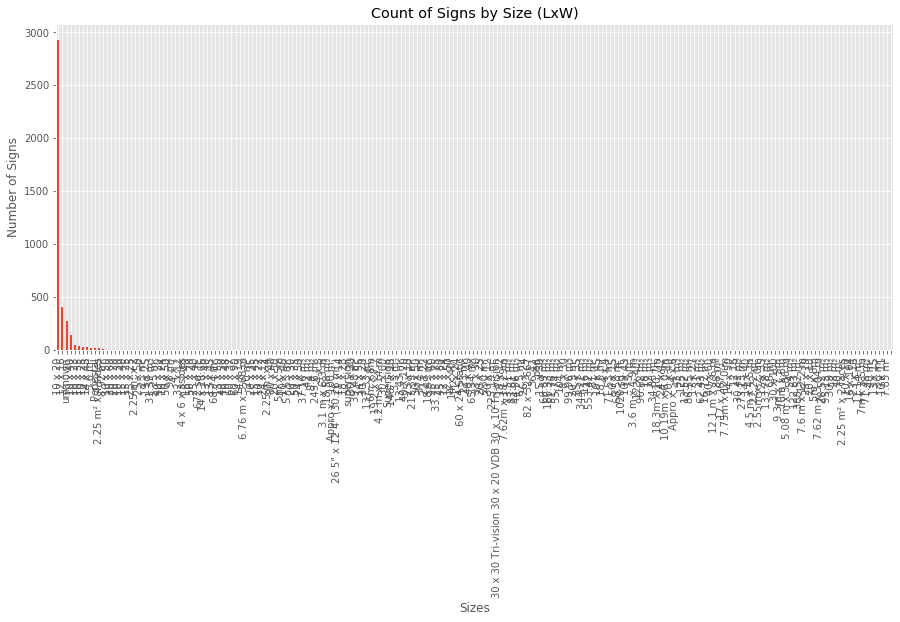

In [55]:
# Show the count of signs by their Size (LxW)
df_signs['Size (LxW)'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Signs by Size (LxW)')
plt.ylabel('Number of Signs')
plt.xlabel('Sizes')

plt.show() # need this line to show the updates made to the figure

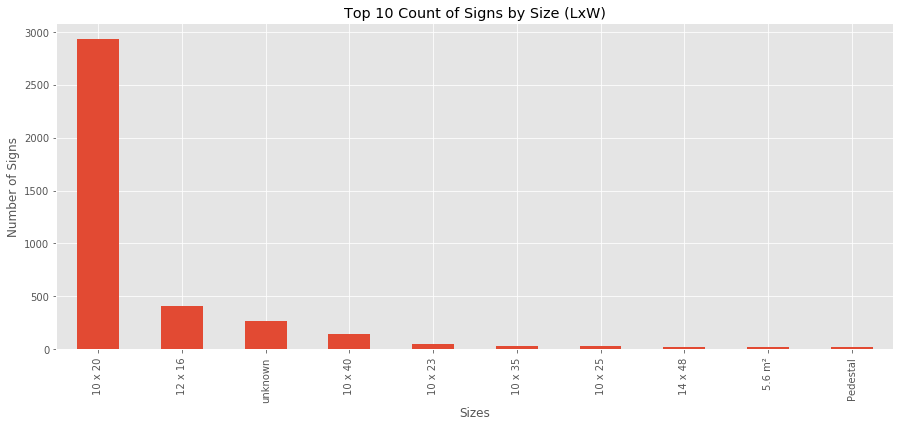

In [56]:
# Show the count of signs by their Size (LxW), but only the top 10
df_signs['Size (LxW)'].value_counts().head(10).plot(kind='bar', figsize=(15,6))

plt.title('Top 10 Count of Signs by Size (LxW)')
plt.ylabel('Number of Signs')
plt.xlabel('Sizes')

plt.show()

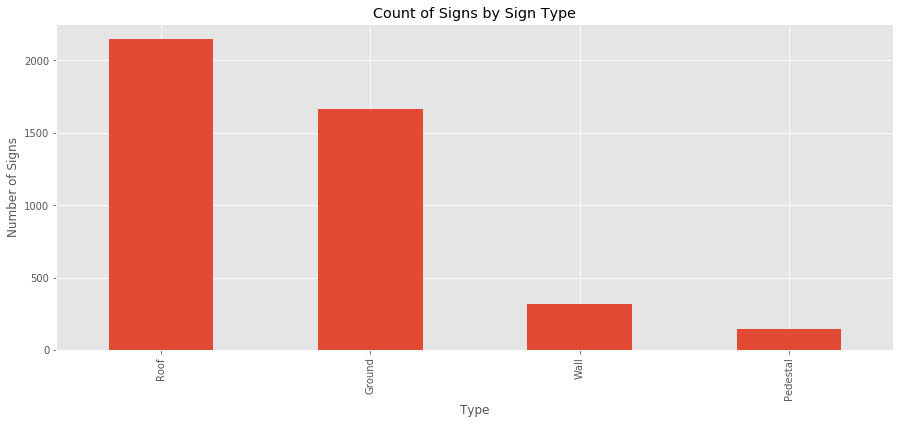

In [57]:
# Show the count of signs by their type
df_signs['Sign Type'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Signs by Sign Type')
plt.ylabel('Number of Signs')
plt.xlabel('Type')

plt.show()

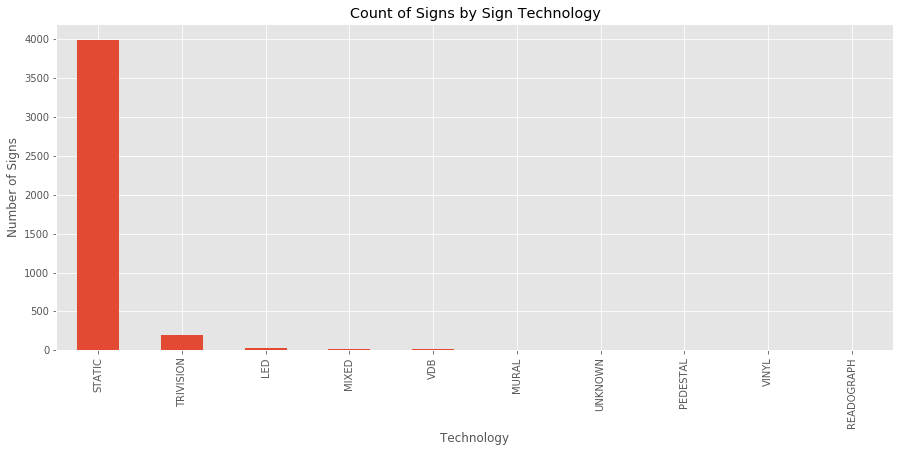

In [58]:
# Show the count of signs by their technology
df_signs['Sign Technology'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Signs by Sign Technology')
plt.ylabel('Number of Signs')
plt.xlabel('Technology')

plt.show()

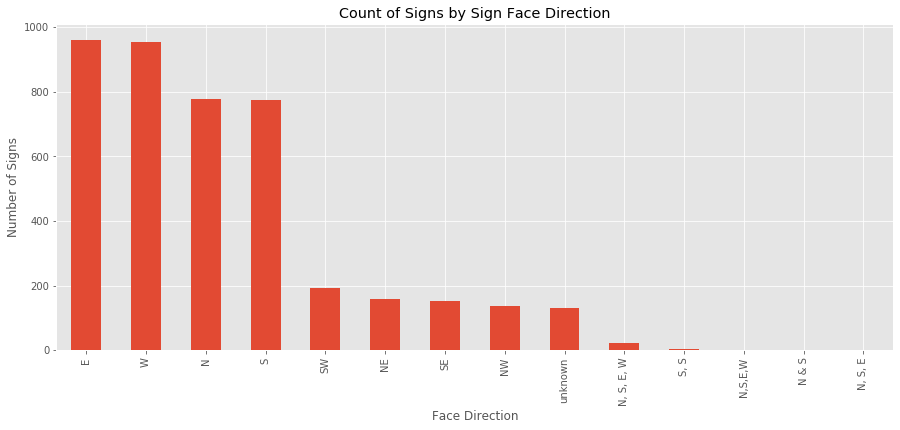

In [59]:
# Show the count of signs by their facing direction
df_signs['Sign Face Direction'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Signs by Sign Face Direction')
plt.ylabel('Number of Signs')
plt.xlabel('Face Direction')

plt.show()

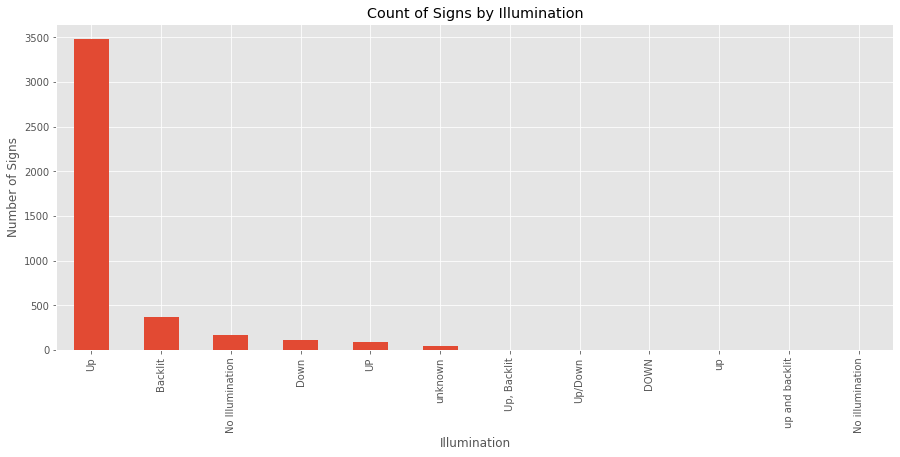

In [60]:
# Show the count of signs by their illumination
df_signs['Illumination'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Signs by Illumination')
plt.ylabel('Number of Signs')
plt.xlabel('Illumination')

plt.show()

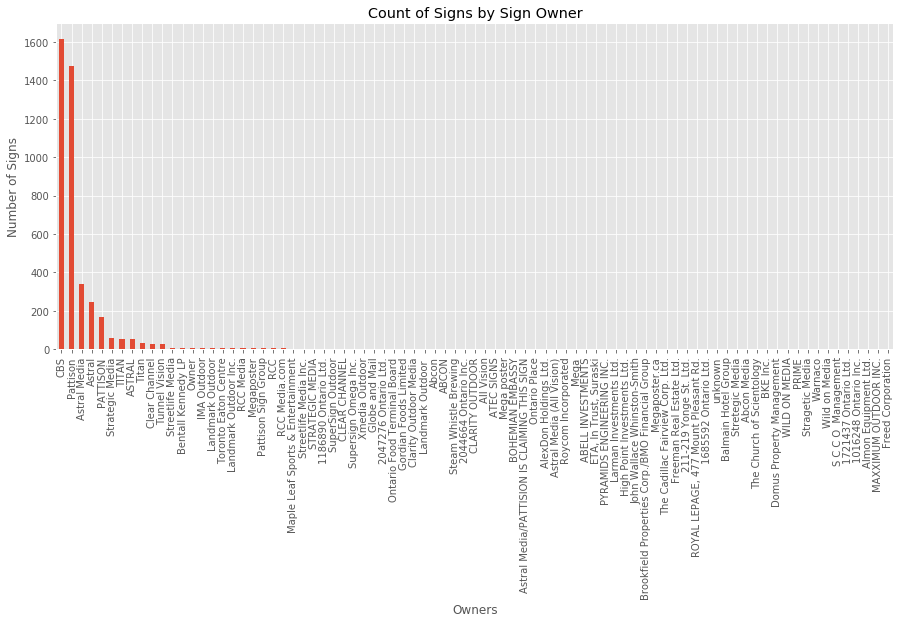

In [61]:
# Show the count of signs by Sign Owner
df_signs['Sign Owner'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Signs by Sign Owner')
plt.ylabel('Number of Signs')
plt.xlabel('Owners')

plt.show()

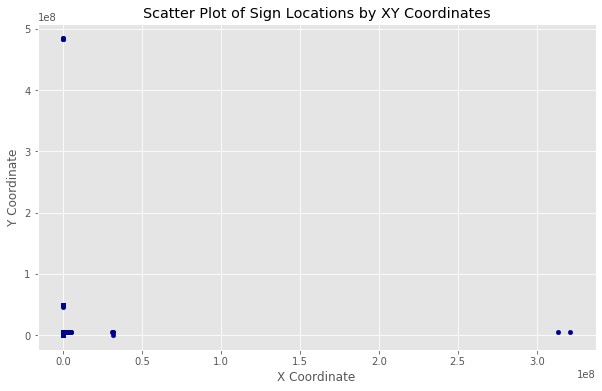

In [62]:
df_signs.plot(kind='scatter', x='X Coordinate', y='Y Coordinate', figsize=(10, 6), color='darkblue')

plt.title('Scatter Plot of Sign Locations by XY Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()

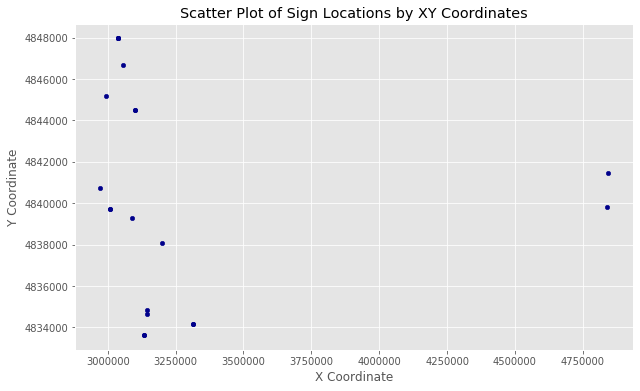

In [63]:
# Due to some outliers, the majority of the plots are not visible
# Remove the outliers and try again
df_scatter = df_signs[((df_signs['X Coordinate'] < 30000000) & (df_signs['X Coordinate'] > 1000000)) & (df_signs['Y Coordinate'] < 40000000)]
df_scatter.plot(kind='scatter', x='X Coordinate', y='Y Coordinate', figsize=(10, 6), color='darkblue')

plt.title('Scatter Plot of Sign Locations by XY Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()

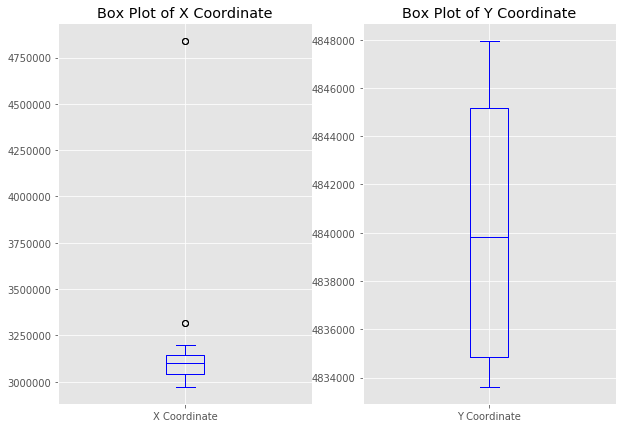

In [64]:
# box plots of X and Y coordinates
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

df_scatter['X Coordinate'].plot(kind='box', figsize=(10, 7), color='blue', vert=True, ax=ax0)
df_scatter['Y Coordinate'].plot(kind='box', figsize=(10, 7), color='blue', vert=True, ax=ax1)

ax0.set_title('Box Plot of X Coordinate')
ax1.set_title('Box Plot of Y Coordinate')


plt.show()

### Toronto Police Services - KSI Data

From the metadata file found at http://data.torontopolice.on.ca/datasets/ksi:

|Number|Field_Name|Description|Type|ObjectId|
|------|----------|-----------|----|--------|
|1|Index|Unique Identifier|Number|1|
|2|ACCNUM|Accident Number|Number|2|
|3|YEAR|Year Accident Occurred|Number|3|
|4|DATE|Date Accident Occurred|Date or Time|4|
|5|TIME|Time Accident Occurred|Text|5|
|6|HOUR|Hour Accident Occurred|Number|6|
|7|STREET1|Street Accident Occurred|Text|7|
|8|STREET2|Street Accident Occurred|Text|8|
|9|OFFSET|Distance and direction of the accident |Text|9|
|10|ROAD_CLASS|Road Classification|Text|10|
|11|District|City District|Text|11|
|12|LATITUDE|Latitude|Number|12|
|13|LONGITUDE|Longitude|Number|13|
|14|LOCCOORD|Location Coordinate|Text|14|
|15|ACCLOC|Accident Location|Text|15|
|16|TRAFFCTL|Traffic Control Type|Text|16|
|17|VISIBILITY|Environment Condition|Text|17|
|18|LIGHT|Light Condition|Text|18|
|19|RDSFCOND|Road Surface Condition|Text|19|
|20|ACCLASS|Classification of Accident|Text|20|
|21|IMPACTYPE|Initial Impact Type|Text|21|
|22|INVTYPE|Involvement Type |Text|22|
|23|INVAGE|Age of Involved Party|Text|23|
|24|INJURY|Severity of Injury|Text|24|
|25|FATAL_NO|Sequential Number |Number|25|
|26|INITDIR|Initial Direction of Travel|Text|26|
|27|VEHTYPE|Type of Vehicle|Text|27|
|28|MANOEUVER|Vehicle Manouever|Text|28|
|29|DRIVACT|Apparent Driver Action|Text|29|
|30|DRIVCOND|Driver Condition|Text|30|
|31|PEDTYPE|Pedestrian Crash Type - detail |Text|31|
|32|PEDACT|Pedestrian Action|Text|32|
|33|PEDCOND|Condition of Pedestrian|Text|33|
|34|CYCLISTYPE|Cyclist Crash Type - detail|Text|34|
|35|CYCACT|Cyclist Action|Text|35|
|36|CYCCOND|Cyclist Condition|Text|36|
|37|PEDESTRIAN|Pedestrian Involved In Collision|Text|37|
|38|CYCLIST|Cyclists Involved in Collision|Text|38|
|39|AUTOMOBILE|Driver  Involved in Collision|Text|39|
|40|MOTORCYCLE|Motorcyclist  Involved in Collision|Text|40|
|41|TRUCK|Truck Driver  Involved in Collision|Text|41|
|42|TRSN_CITY_VEH|Transit or City Vehicle  Involved in Collision|Text|42|
|43|EMERG_VEH|Emergency Vehicle  Involved in Collision|Text|43|
|44|PASSENGER|Passenger Involved in Collision|Text|44|
|45|SPEEDING|Speeding Related Collision|Text|45|
|46|AG_DRIV|Aggressive and Distracted Driving Collision|Text|46|
|47|REDLIGHT|Red Light Related Collision|Text|47|
|48|ALCOHOL|Alcohol Related Collision|Text|48|
|49|DISABILITY|Medical or Physical Disability Related Collision|Text|49|
|50|Police Division|Police Division|Text|50|
|51|City Ward|City Ward|Text|51|
|52|City Ward ID |City Ward Identificator|Number|52|
|53|Neighbourhood ID|Neighbourhood Identificator|Number|53|
|54|Neighbourhood Name|Neighbourhood Name|Number|54|
|55|FID|Object ID (Unique Identifier)|Unique ID|55|
|56|X|Latitude|Number|56|
|57|Y|Longitude|Number|57|


In [65]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import xlrd

# Set the file path
fp = "../data/KSIData"

df_ksi = None

# Build the dataframe
df_ksi = pd.read_csv(fp + "/ksi.csv")

In [66]:
df_ksi.head()

X          Y    Index_      ACCNUM  YEAR                      DATE  \
0 -79.454730  43.675280  80771254  7001005616  2017  2017-06-03T04:00:00.000Z   
1 -79.520641  43.770049  80783528  7001744141  2017  2017-09-25T04:00:00.000Z   
2 -79.520641  43.770049  80783529  7001744141  2017  2017-09-25T04:00:00.000Z   
3 -79.286601  43.751868  80790062  7003112978  2017  2017-12-01T05:00:00.000Z   
4 -79.286601  43.751868  80790894  7003112978  2017  2017-12-01T05:00:00.000Z   

   TIME  Hour         STREET1        STREET2  ... AG_DRIV REDLIGHT ALCOHOL  \
0  2330    23  ST CLAIR AVE W   CALEDONIA RD  ...     Yes                    
1  2330    23    4673 JANE ST                 ...     Yes                    
2  2330    23    4673 JANE ST                 ...     Yes                    
3  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                            
4  2330    23   BIRCHMOUNT RD  MERRYFIELD DR  ...                            

   DISABILITY  Division Ward_Name Ward_ID Hood_ID Hood_Name ObjectId  
0                    13       NaN     NaN      92       NaN    12001  
1                    31       NaN     NaN      24       NaN    12002  
2                    31       NaN     NaN      24       NaN    12003  
3                    41       NaN     NaN     126       NaN    12004  
4                    41       NaN     NaN     126       NaN    12005  

[5 rows x 57 columns]

In [67]:
df_ksi.tail()

X          Y    Index_      ACCNUM  YEAR  \
12239 -79.607532  43.738547  80632445  6000713724  2016   
12240 -79.343590  43.707445   6662771     1248427  2011   
12241 -79.343590  43.707445   6662772     1248427  2011   
12242 -79.343590  43.707445   6662773     1248427  2011   
12243 -79.343590  43.707445   6662774     1248427  2011   

                           DATE  TIME  Hour       STREET1  \
12239  2016-04-26T04:00:00.000Z  1910    19    CARRIER DR   
12240  2011-06-26T04:00:00.000Z  1911    19  OVERLEA BLVD   
12241  2011-06-26T04:00:00.000Z  1911    19  OVERLEA BLVD   
12242  2011-06-26T04:00:00.000Z  1911    19  OVERLEA BLVD   
12243  2011-06-26T04:00:00.000Z  1911    19  OVERLEA BLVD   

                   STREET2  ... AG_DRIV REDLIGHT ALCOHOL  DISABILITY  \
12239  WOODBINE DOWNS BLVD  ...     Yes                                
12240  THORNCLIFFE PARK DR  ...     Yes                                
12241  THORNCLIFFE PARK DR  ...     Yes                                
12242  THORNCLIFFE PARK DR  ...     Yes                                
12243  THORNCLIFFE PARK DR  ...     Yes                                

       Division Ward_Name Ward_ID Hood_ID Hood_Name ObjectId  
12239        23       NaN     NaN       1       NaN     8996  
12240        53       NaN     NaN      55       NaN     8997  
12241        53       NaN     NaN      55       NaN     8998  
12242        53       NaN     NaN      55       NaN     8999  
12243        53       NaN     NaN      55       NaN     9000  

[5 rows x 57 columns]

In [68]:
# Get the shape of the dataframe
df_ksi.shape

(12244, 57)

In [69]:
# Show some basic info
df_ksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12244 entries, 0 to 12243
Data columns (total 57 columns):
X                12244 non-null float64
Y                12244 non-null float64
Index_           12244 non-null int64
ACCNUM           12244 non-null int64
YEAR             12244 non-null int64
DATE             12244 non-null object
TIME             12244 non-null int64
Hour             12244 non-null int64
STREET1          12244 non-null object
STREET2          12244 non-null object
OFFSET           12244 non-null object
ROAD_CLASS       12244 non-null object
District         12244 non-null object
LATITUDE         12244 non-null float64
LONGITUDE        12244 non-null float64
LOCCOORD         12244 non-null object
ACCLOC           12244 non-null object
TRAFFCTL         12244 non-null object
VISIBILITY       12244 non-null object
LIGHT            12244 non-null object
RDSFCOND         12244 non-null object
ACCLASS          12244 non-null object
IMPACTYPE        12244 non-null ob

In [70]:
# Describe the data
df_ksi.describe()

X             Y        Index_        ACCNUM          YEAR  \
count  12244.000000  12244.000000  1.224400e+04  1.224400e+04  12244.000000   
mean     -79.396212     43.710748  3.587528e+07  2.370242e+09   2012.688909   
std        0.103606      0.056192  3.625811e+07  3.074230e+09      3.136108   
min      -79.638390     43.592047  0.000000e+00  1.284070e+05   2008.000000   
25%      -79.468615     43.662445  6.176591e+06  1.180965e+06   2010.000000   
50%      -79.397290     43.702246  7.559770e+06  1.335254e+06   2012.000000   
75%      -79.319248     43.756827  8.054227e+07  5.002033e+09   2015.000000   
max      -79.125896     43.855445  8.109988e+07  8.008069e+09   2018.000000   

               TIME          Hour      LATITUDE     LONGITUDE      FATAL_NO  \
count  12244.000000  12244.000000  12244.000000  12244.000000  12244.000000   
mean    1352.408118     13.243711     43.710748    -79.396212      1.471905   
std      624.950019      6.257227      0.056192      0.103606      7.595429   
min        0.000000      0.000000     43.592047    -79.638390      0.000000   
25%      920.000000      9.000000     43.662445    -79.468615      0.000000   
50%     1440.000000     14.000000     43.702246    -79.397290      0.000000   
75%     1838.000000     18.000000     43.756827    -79.319248      0.000000   
max     2359.000000     23.000000     43.855445    -79.125896     78.000000   

       TRSN_CITY_VEH  Ward_Name  Ward_ID       Hood_ID  Hood_Name  \
count            0.0        0.0      0.0  12244.000000        0.0   
mean             NaN        NaN      NaN     73.352499        NaN   
std              NaN        NaN      NaN     41.372891        NaN   
min              NaN        NaN      NaN      0.000000        NaN   
25%              NaN        NaN      NaN     38.000000        NaN   
50%              NaN        NaN      NaN     77.000000        NaN   
75%              NaN        NaN      NaN    111.000000        NaN   
max              NaN        NaN      NaN    140.000000        NaN   

           ObjectId  
count  12244.000000  
mean    6122.500000  
std     3534.682683  
min        1.000000  
25%     3061.750000  
50%     6122.500000  
75%     9183.250000  
max    12244.000000

In [71]:
# Describe the non-numeric data
df_ksi.describe(include='object')

DATE   STREET1 STREET2 OFFSET      ROAD_CLASS  \
count                      12244     12244   12244  12244           12244   
unique                      2623      1410    2115    341               9   
top     2014-08-17T04:00:00.000Z  YONGE ST                 Major Arterial   
freq                          35       244    1053  10259            8343   

                     District      LOCCOORD           ACCLOC    TRAFFCTL  \
count                   12244         12244            12244       12244   
unique                      6             5               11          10   
top     Toronto and East York  Intersection  At Intersection  No Control   
freq                     4521          8236             5747        5921   

       VISIBILITY  ... MOTORCYCLE  TRUCK EMERG_VEH PASSENGER SPEEDING AG_DRIV  \
count       12244  ...      12244  12244     12244     12244    12244   12244   
unique          9  ...          2      2         2         2        2       2   
top         Clear  ...                                                    Yes   
freq        10515  ...      11192  11522     12218      7750    10209    6324   

       REDLIGHT ALCOHOL DISABILITY Division  
count     12244   12244      12244    12244  
unique        2       2          2       52  
top                                      42  
freq      11285   11757      11904     1153  

[4 rows x 41 columns]

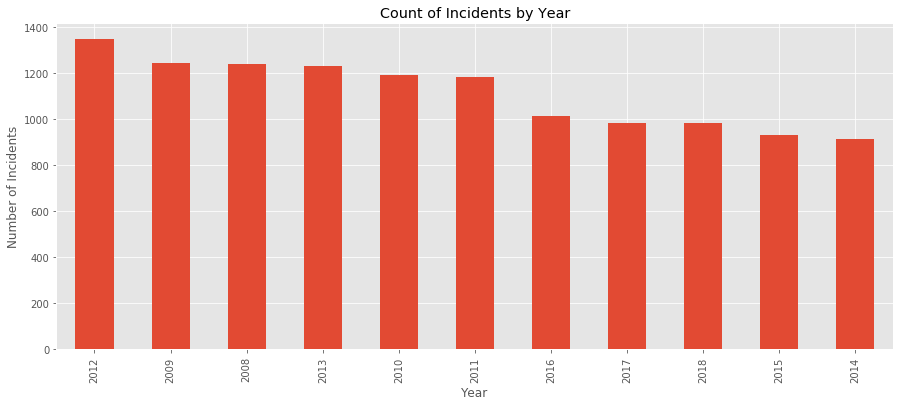

In [72]:
# Show the count of incidents by year
df_ksi['YEAR'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Year')
plt.ylabel('Number of Incidents')
plt.xlabel('Year')

plt.show()

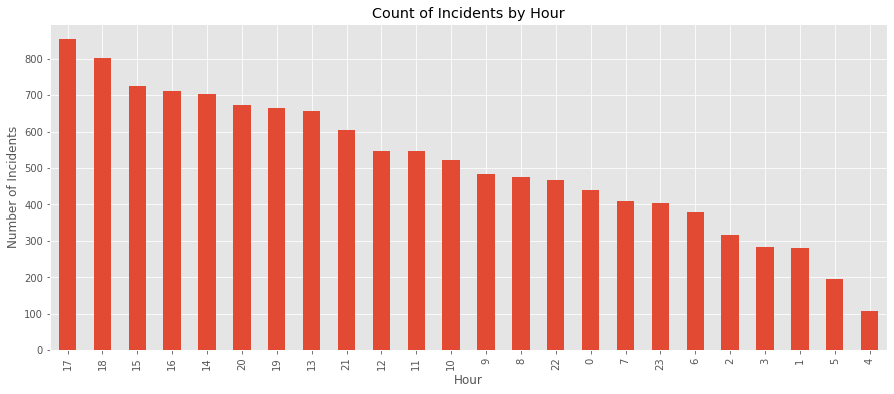

In [73]:
# Show the count of incidents by the hour they occurred
df_ksi['Hour'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Hour')
plt.ylabel('Number of Incidents')
plt.xlabel('Hour')

plt.show()

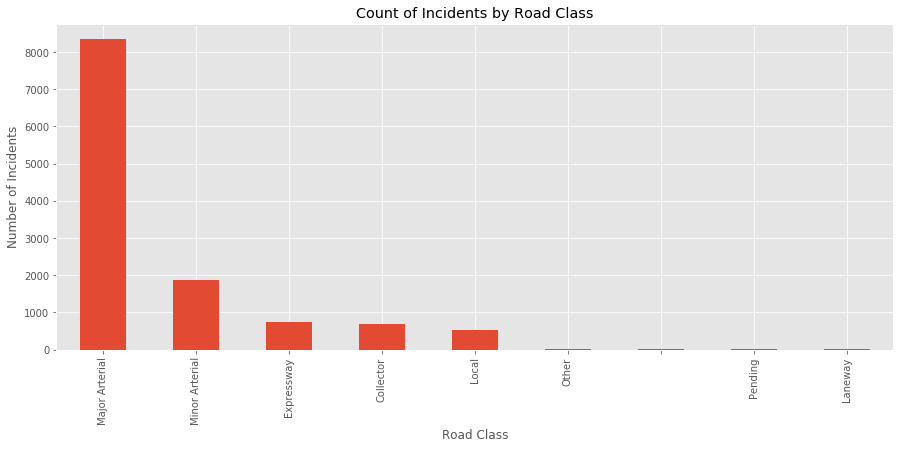

In [74]:
# Show the count of incidents by the road class
df_ksi['ROAD_CLASS'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Road Class')
plt.ylabel('Number of Incidents')
plt.xlabel('Road Class')

plt.show()

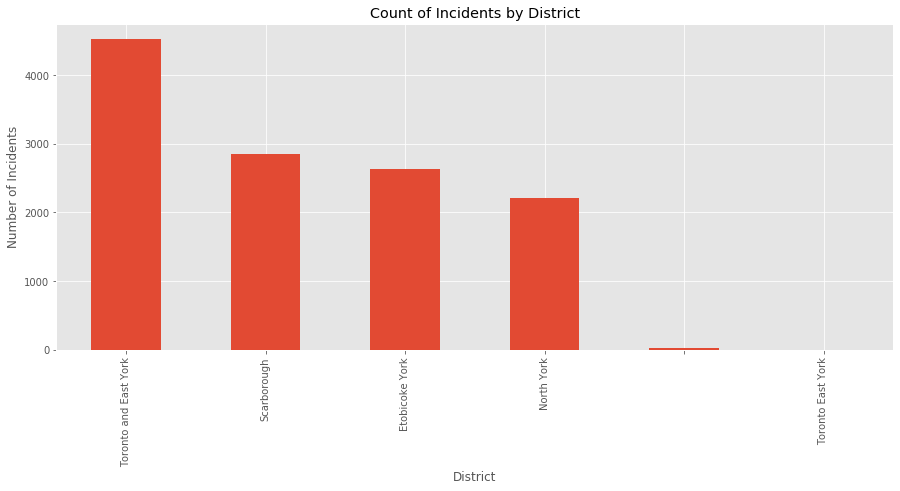

In [75]:
# Show the count of incidents by the district
df_ksi['District'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by District')
plt.ylabel('Number of Incidents')
plt.xlabel('District')

plt.show()

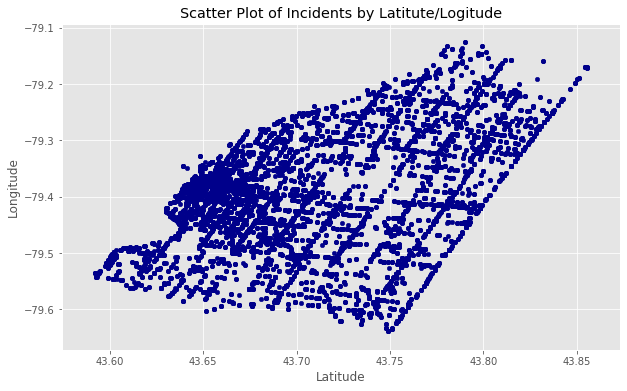

In [76]:
# Scatter plot the LAT LON coordinates for now, do this geographically later
df_ksi.plot(kind='scatter', x='LATITUDE', y='LONGITUDE', figsize=(10, 6), color='darkblue')

plt.title('Scatter Plot of Incidents by Latitute/Logitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

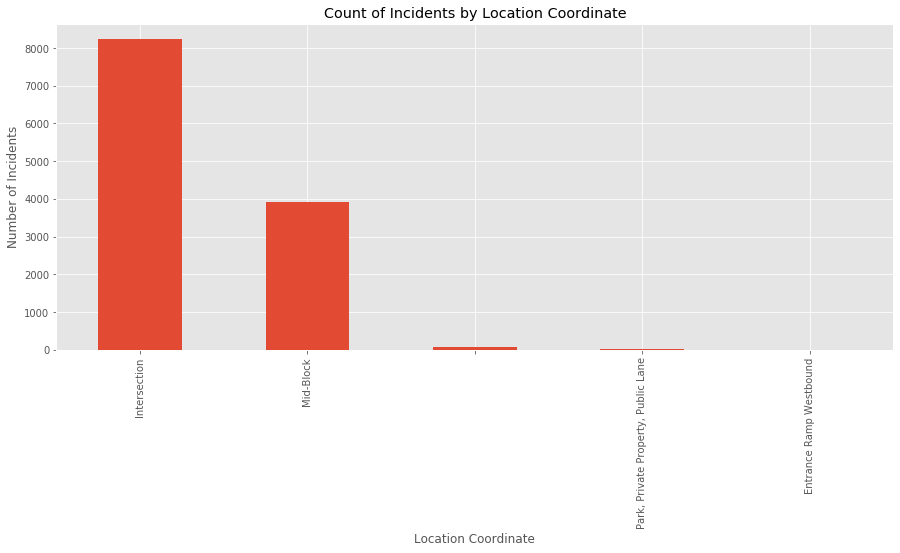

In [77]:
# Show the count of incidents by the location coordinate
df_ksi['LOCCOORD'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Location Coordinate')
plt.ylabel('Number of Incidents')
plt.xlabel('Location Coordinate')

plt.show()

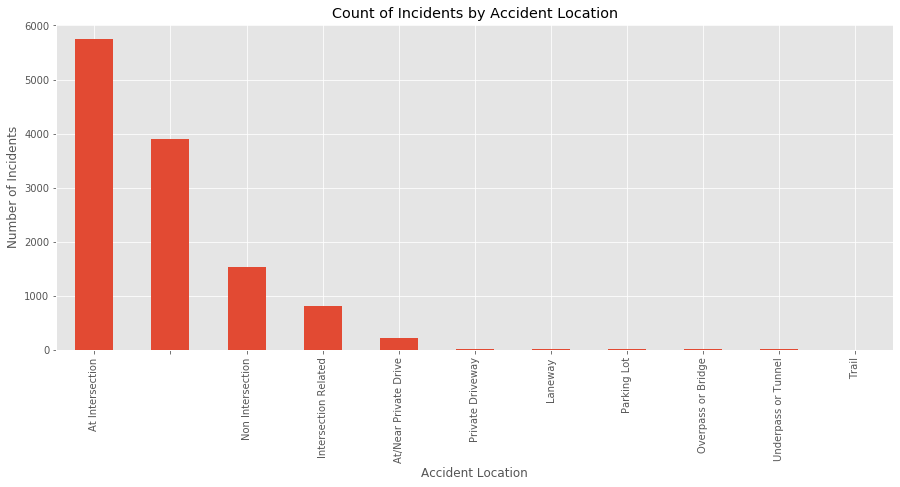

In [78]:
# Show the count of incidents by the accident location
df_ksi['ACCLOC'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Accident Location')
plt.ylabel('Number of Incidents')
plt.xlabel('Accident Location')

plt.show()

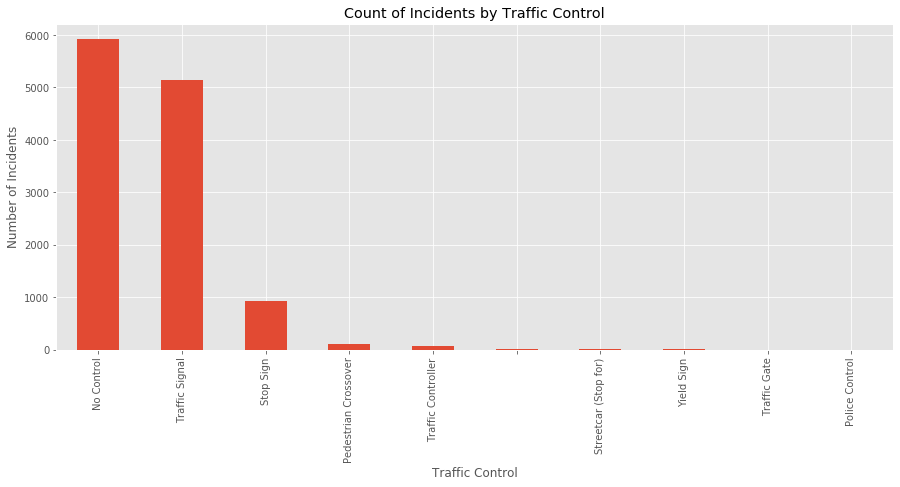

In [79]:
# Show the count of incidents by the traffic control 
df_ksi['TRAFFCTL'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Traffic Control')
plt.ylabel('Number of Incidents')
plt.xlabel('Traffic Control')

plt.show()

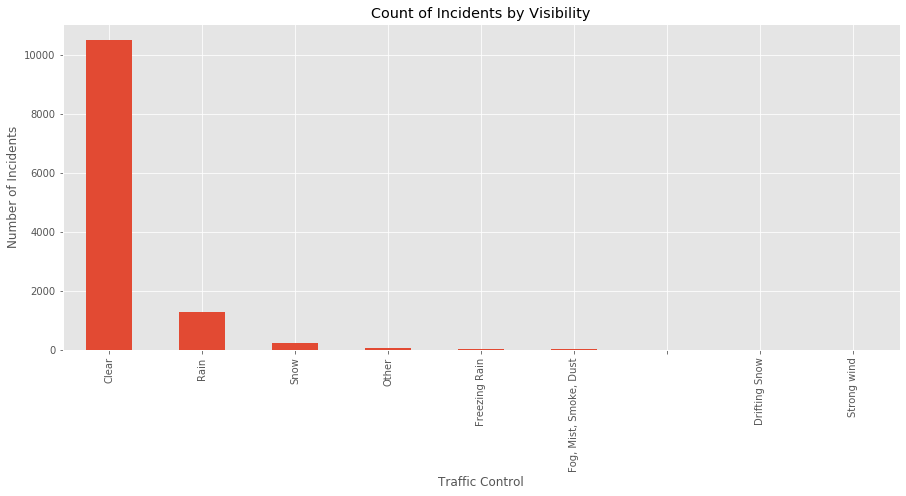

In [80]:
# Show the count of incidents by visibility 
df_ksi['VISIBILITY'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Visibility')
plt.ylabel('Number of Incidents')
plt.xlabel('Traffic Control')

plt.show()

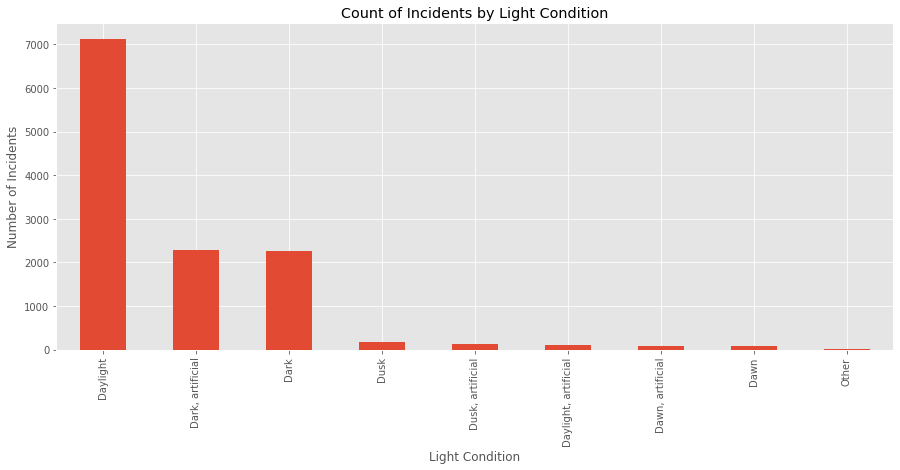

In [81]:
# Show the count of incidents by light condition 
df_ksi['LIGHT'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Light Condition')
plt.ylabel('Number of Incidents')
plt.xlabel('Light Condition')

plt.show()

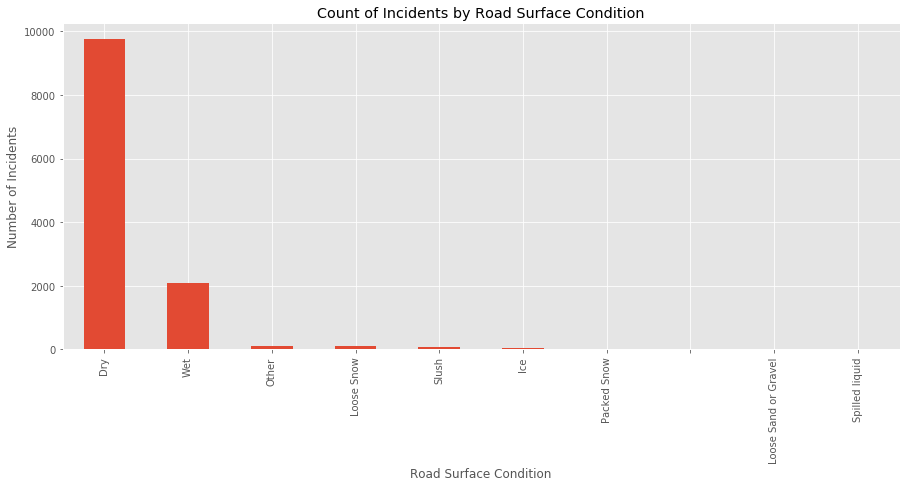

In [82]:
# Show the count of incidents by road surface condition 
df_ksi['RDSFCOND'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Road Surface Condition')
plt.ylabel('Number of Incidents')
plt.xlabel('Road Surface Condition')

plt.show()

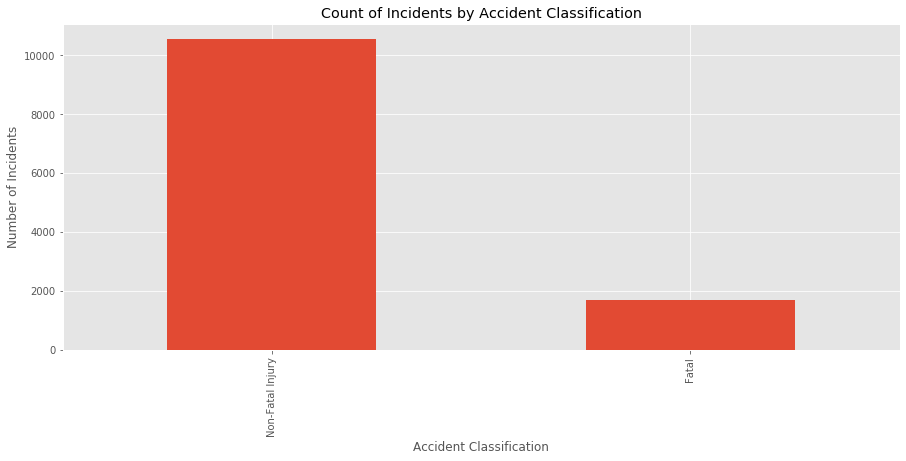

In [83]:
# Show the count of incidents by accident classification 
df_ksi['ACCLASS'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Accident Classification')
plt.ylabel('Number of Incidents')
plt.xlabel('Accident Classification')

plt.show()

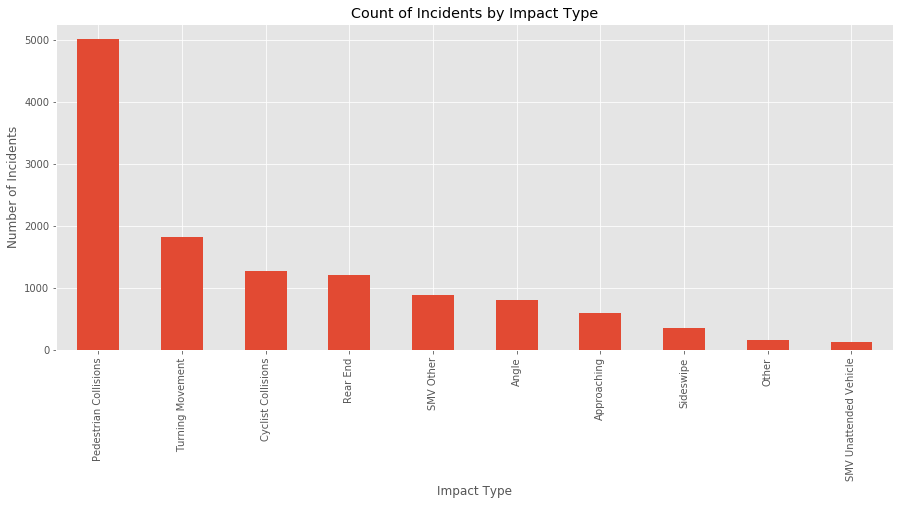

In [84]:
# Show the count of incidents by impact type 
df_ksi['IMPACTYPE'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Impact Type')
plt.ylabel('Number of Incidents')
plt.xlabel('Impact Type')

plt.show()

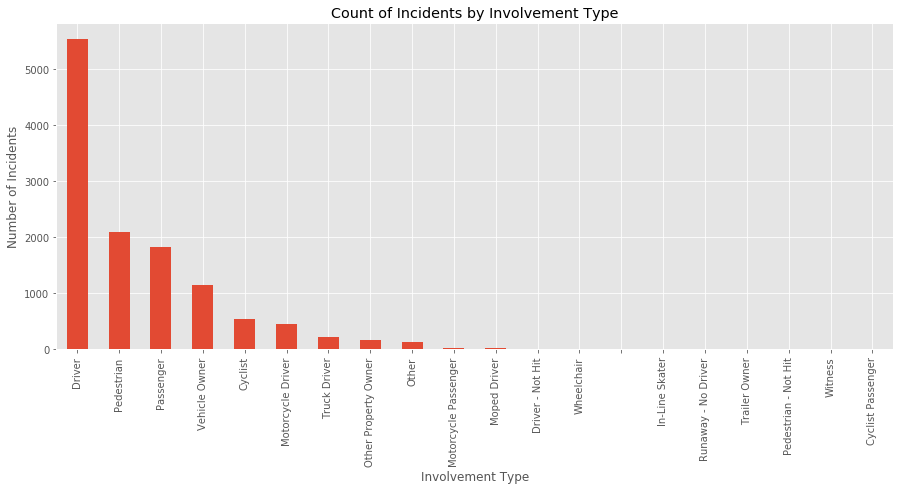

In [85]:
# Show the count of incidents by involvement type 
df_ksi['INVTYPE'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Involvement Type')
plt.ylabel('Number of Incidents')
plt.xlabel('Involvement Type')

plt.show()

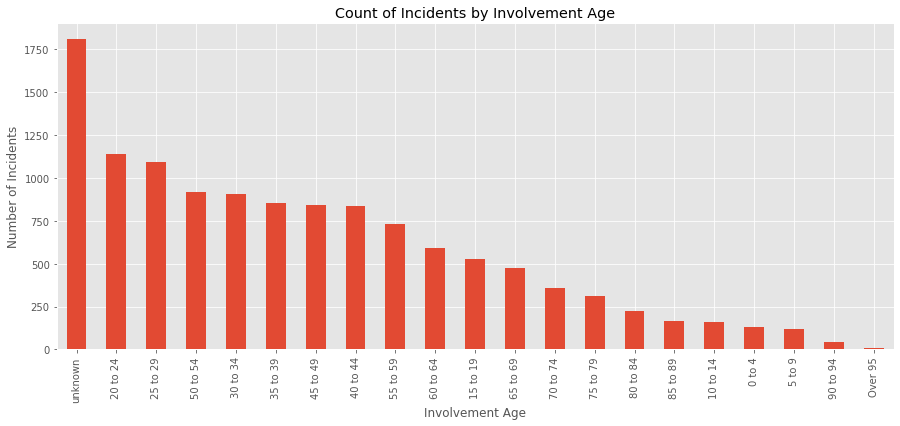

In [86]:
# Show the count of incidents by involvement age 
df_ksi['INVAGE'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Involvement Age')
plt.ylabel('Number of Incidents')
plt.xlabel('Involvement Age')

plt.show()

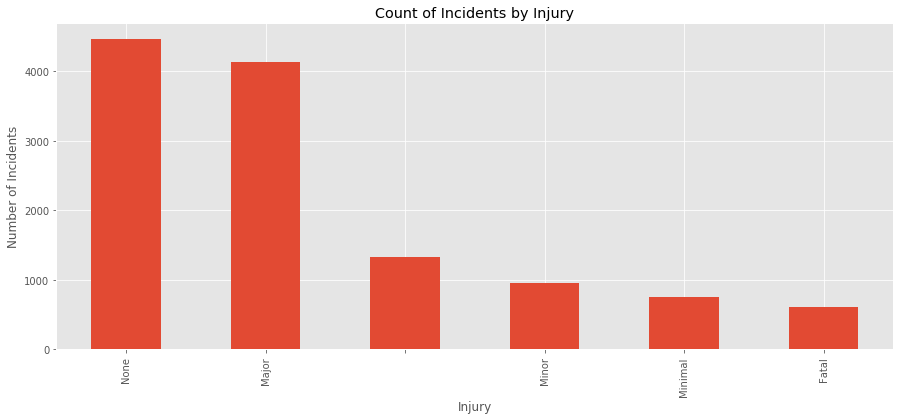

In [87]:
# Show the count of incidents by injury 
df_ksi['INJURY'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Injury')
plt.ylabel('Number of Incidents')
plt.xlabel('Injury')

plt.show()

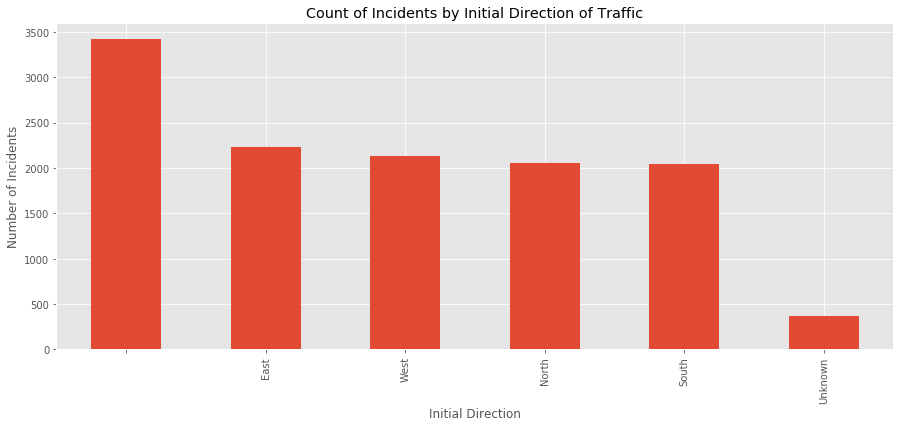

In [88]:
# Show the count of incidents by initial direction of traffic 
df_ksi['INITDIR'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Initial Direction of Traffic')
plt.ylabel('Number of Incidents')
plt.xlabel('Initial Direction')

plt.show()

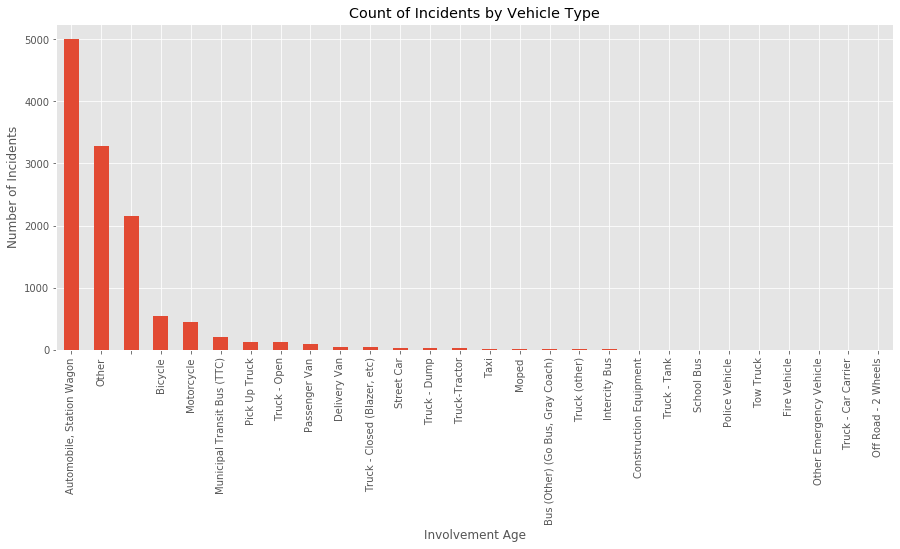

In [89]:
# Show the count of incidents by vehicle type 
df_ksi['VEHTYPE'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Vehicle Type')
plt.ylabel('Number of Incidents')
plt.xlabel('Involvement Age')

plt.show()

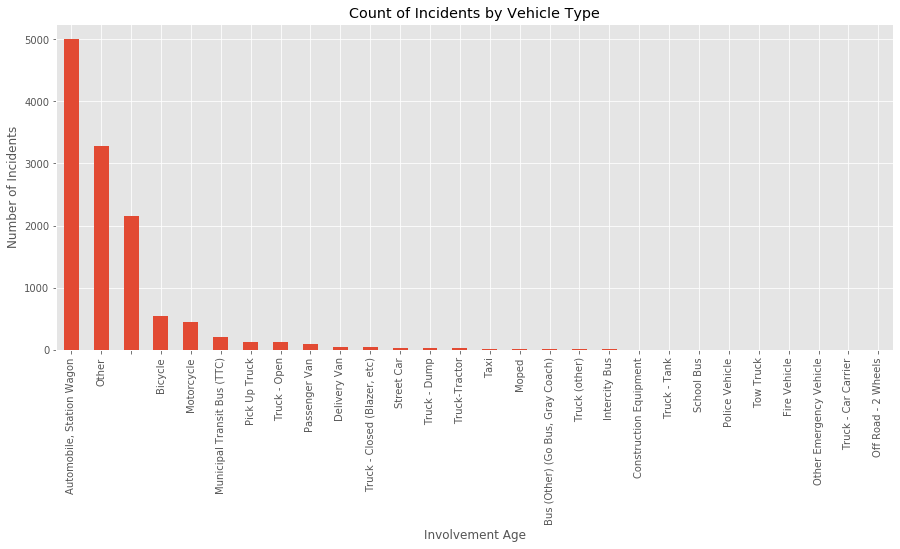

In [90]:
# Show the count of incidents by vehicle type 
df_ksi['VEHTYPE'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Vehicle Type')
plt.ylabel('Number of Incidents')
plt.xlabel('Involvement Age')

plt.show()

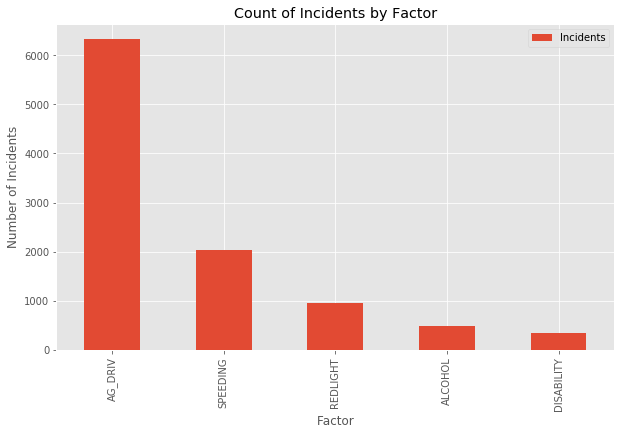

In [91]:
# Show the count of incidents by the determining factor
factor_list = ['SPEEDING','AG_DRIV','REDLIGHT','ALCOHOL','DISABILITY']
factor_df_list = []
for factor in factor_list:
    incidents = df_ksi[factor].value_counts()['Yes']
    fact_dict = {}
    #fact_dict[factor] = incidents
    fact_dict['Factor'] = factor
    fact_dict['Incidents'] = incidents
    factor_df_list.append(fact_dict)

df_factors = pd.DataFrame(factor_df_list)
df_factors.set_index('Factor', inplace=True)
df_factors.sort_values('Incidents', inplace=True, ascending=False)
    
#df_ksi['SPEEDING'].value_counts().plot(kind='bar', figsize=(15,6))
df_factors.plot(kind='bar', figsize=(10, 6))

plt.title('Count of Incidents by Factor')
plt.ylabel('Number of Incidents')
plt.xlabel('Factor')

plt.show()

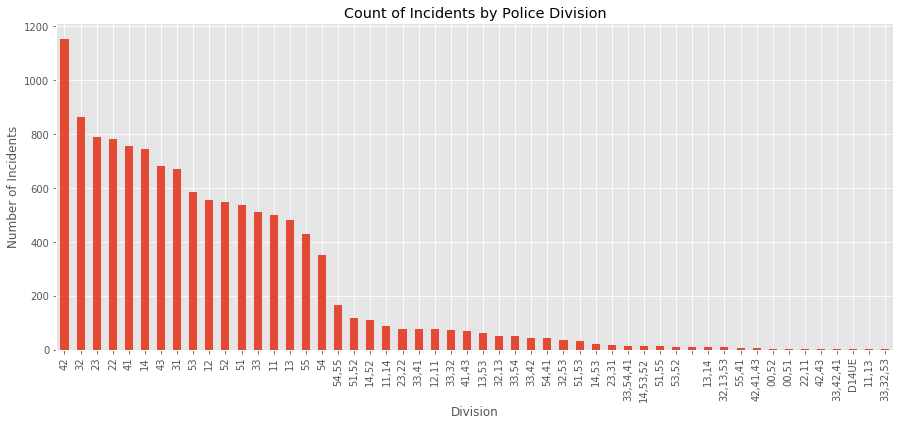

In [92]:
# Show the count of incidents by division
df_ksi['Division'].value_counts().plot(kind='bar', figsize=(15,6))

plt.title('Count of Incidents by Police Division')
plt.ylabel('Number of Incidents')
plt.xlabel('Division')

plt.show()